In [1]:
!pip3 install numpy | grep -v 'already satisfied'
!pip3 install pandas | grep -v 'already satisfied'
!pip3 install seaborn | grep -v 'already satisfied'
!pip3 install scanpy | grep -v 'already satisfied'

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.2 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [3]:
import os

# path
path = "/Volumes/Extreme_SSD/snRNA/"

# for each folder in path make an adata object with a unique name with read_10x_mtx
folders = os.listdir(path)

data=[]
for folder in folders:
    adata = sc.read_10x_mtx(path+folder, var_names='gene_symbols', cache=True, prefix=folder+'_')
    data.append([folder,
                  adata])

... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119522_SF10127-GSM4119522_SF10127_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119523_SF11979sn-GSM4119523_SF11979sn_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119524_SF12090-GSM4119524_SF12090_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119525_SF12264-GSM4119525_SF12264_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119526_SF4400-GSM4119526_SF4400_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119527_SF4297-GSM4119527_SF4297_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119528_SF6996-GSM4119528_SF6996_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119529_SF9259R-GSM4119529_SF9259R_matrix.h5ad
... reading from cache file cache/Volumes-Extreme_SSD-snRNA-GSM4119530_SF9259S-GSM4119530_SF9259S_matrix.h5ad
... reading 

In [4]:
adata_us_combined = sc.read_h5ad('write/human_combined_2.h5ad')
adata_total_combined = sc.read_h5ad('write/total_combined.h5ad')


In [43]:
sc.pp.neighbors(adata_total_combined, n_neighbors=10, n_pcs=40)
sc.tl.leiden(adata_total_combined, resolution=0.5)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:58)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:01)
running Leiden clustering
    finished: found 85 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:08)


In [5]:
# annotate with provide cell types from .txt file
cell_types = pd.read_csv('SF1/GSE138794_snRNA_Seq_cell_types.txt', sep=' ', header=None, index_col=0)

In [6]:
sample_identifiers = [
    "SF10022",
    "SF10127",
    "SF11979",
    "SF12090",
    "SF12264",
    "SF4400",
    "SF4297",
    "SF6996",
    "SF9259R",
    "SF9259S"
]

data2=[]
cell_t = cell_types

for identifier in sample_identifiers:
    # get the adata object in data where sample identifier is in the name of the adata object [0]
    adata = [x for x in data if identifier in x[0]][0][1]
    print(adata)
    cell_t = cell_types
    print(identifier)
    # remove all cell types that don't begin with the sample identifier
    print(cell_types.index.str.startswith(identifier).sum())

    cell_t = cell_t[cell_t.index.str.startswith(identifier)]
    # print(cell_t)
    # remove the sample identifier from the cell type
    cell_t.index = cell_t.index.str.replace(identifier + '_', '')
    # add the cell types to the adata object
    # print(cell_t)
    print(len(cell_t), len(adata))

    # # add the cell types to the adata[i].obs dataframe where index matches obs
    try:
        adata.obs['cell_type'] = cell_t.loc[adata.obs.index, 1]
        # print(adata.obs)
        data2.append([identifier, adata])
    except:
        print('error')
        pass

AnnData object with n_obs × n_vars = 2888 × 33694
    var: 'gene_ids', 'feature_types'
SF10022
2888
2888 2888
AnnData object with n_obs × n_vars = 975 × 33694
    var: 'gene_ids', 'feature_types'
SF10127
975
975 975
AnnData object with n_obs × n_vars = 693 × 33694
    var: 'gene_ids', 'feature_types'
SF11979
693
693 693
error
AnnData object with n_obs × n_vars = 107 × 33694
    var: 'gene_ids', 'feature_types'
SF12090
107
107 107
AnnData object with n_obs × n_vars = 2324 × 33694
    var: 'gene_ids', 'feature_types'
SF12264
2324
2324 2324
AnnData object with n_obs × n_vars = 489 × 33694
    var: 'gene_ids', 'feature_types'
SF4400
489
489 489
AnnData object with n_obs × n_vars = 3901 × 33694
    var: 'gene_ids', 'feature_types'
SF4297
3901
3901 3901
AnnData object with n_obs × n_vars = 2669 × 33694
    var: 'gene_ids', 'feature_types'
SF6996
2669
2669 2669
AnnData object with n_obs × n_vars = 1422 × 33694
    var: 'gene_ids', 'feature_types'
SF9259R
1422
1422 1422
AnnData object with n_o

In [7]:
# combine all adata objects into one adata object with concatenate
adata_ref_combined = sc.AnnData.concatenate(*[x[1] for x in data2], batch_categories=[x[0] for x in data2])

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next 

In [8]:
sc.pp.pca(adata_ref_combined)
sc.pp.neighbors(adata_ref_combined)
sc.tl.umap(adata_ref_combined)

computing PCA
    with n_comps=50
    finished (0:01:01)
computing neighbors
    using 'X_pca' with n_pcs = 50


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [37]:
sc.tl.louvain(adata_ref_combined, resolution=0.5)
sc.tl.leiden(adata_ref_combined, resolution=0.5)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


In [10]:
adata_ref_combined.obs['cell_type'].value_counts()

Neoplastic_cell/proneural      4970
Oligodendrocyte                3711
Neoplastic_cell/mesenchymal    3328
Myeloid                        2395
Neoplastic_cell                 931
Astrocyte                       243
Endothelial_cell                 46
Name: cell_type, dtype: int64

/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


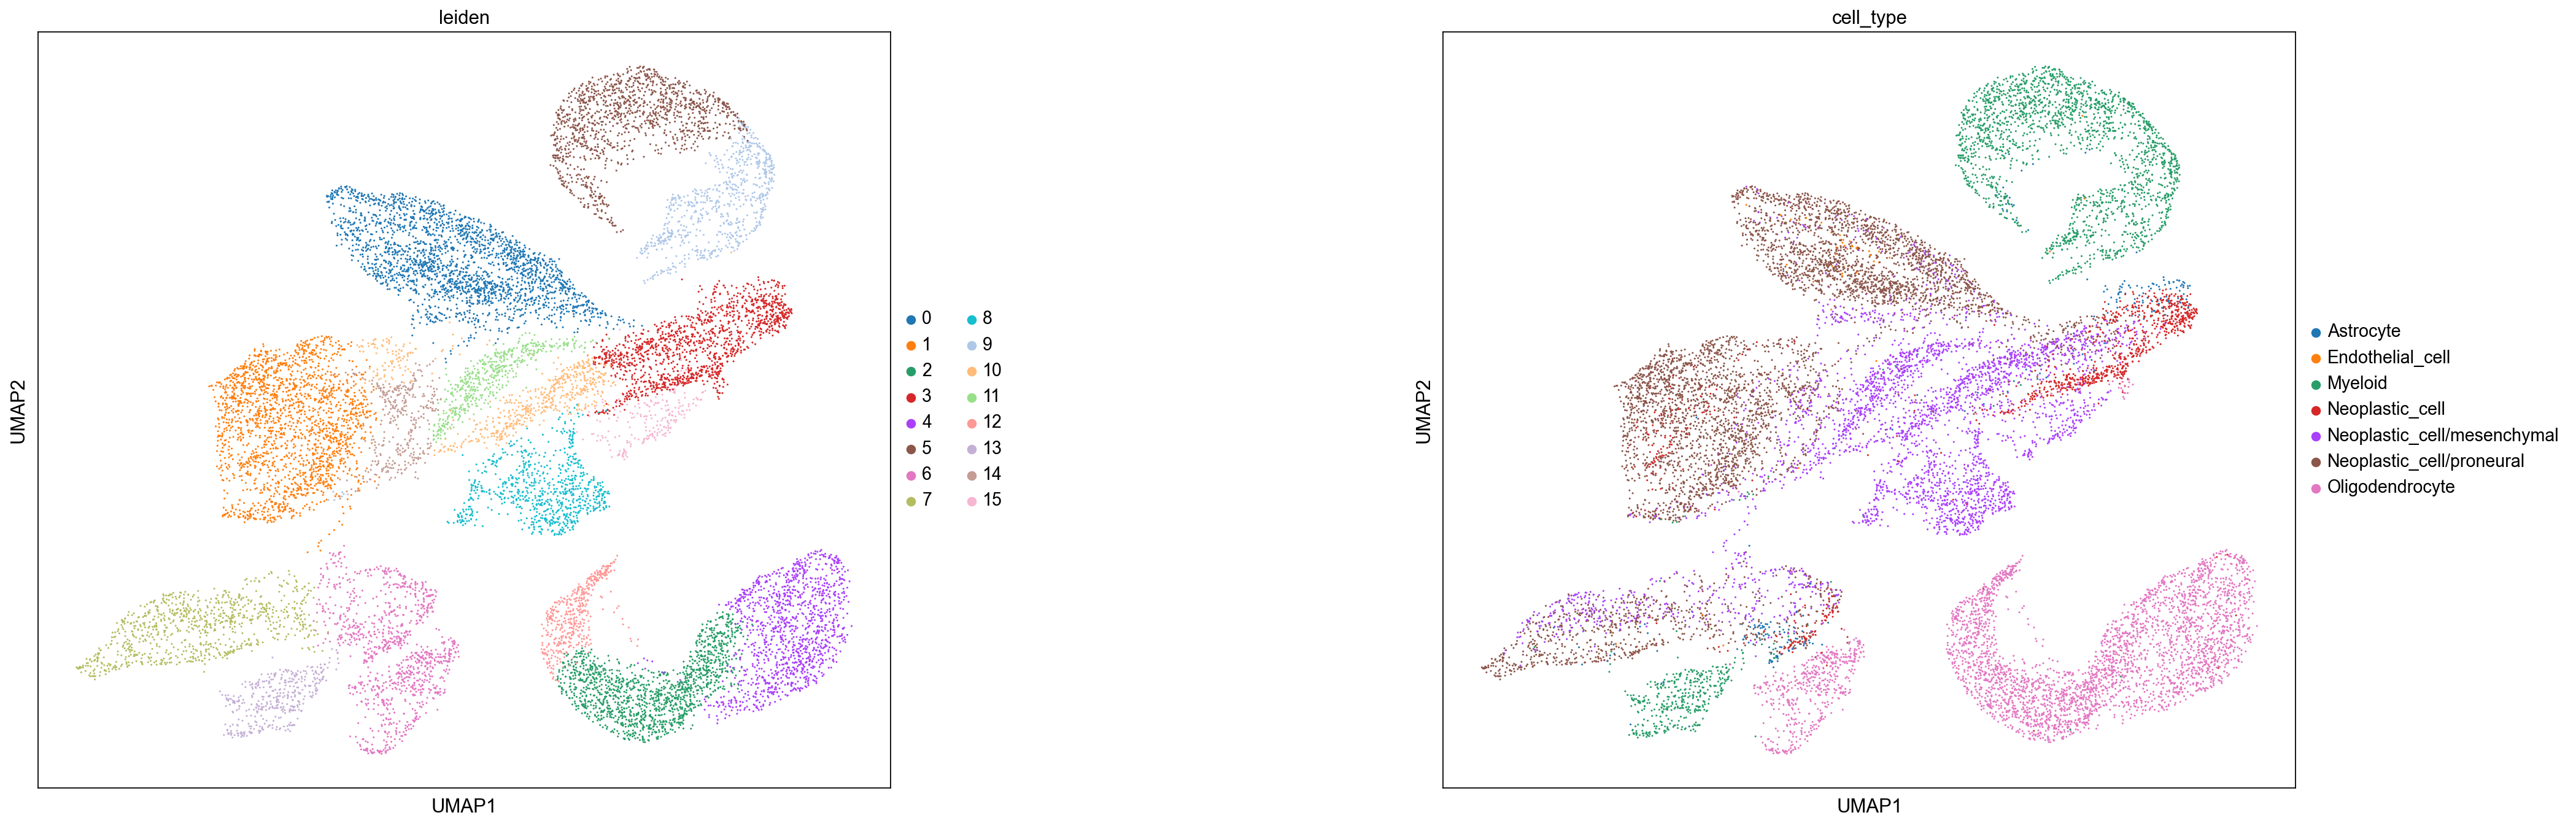

In [38]:
sc.pl.umap(adata_ref_combined, color=['leiden', 'cell_type'], wspace=0.5)


In [44]:
var_names = adata_ref_combined.var_names.intersection(adata_total_combined.var_names)
adata_ref = adata_ref_combined[:, var_names]
adata_total = adata_total_combined[:, var_names]

In [45]:
adata_total_combined.var

gene_ids-1914_human-1914 feature_types-1914_human-1914  \
0610030E20Rik                      NaN                           NaN   
0610040J01Rik                      NaN                           NaN   
1110002E22Rik                      NaN                           NaN   
1110032F04Rik                      NaN                           NaN   
1110038F14Rik                      NaN                           NaN   
...                                ...                           ...   
mrpl24                             NaN                           NaN   
mrpl9                              NaN                           NaN   
pramef20l                          NaN                           NaN   
rnf141                             NaN                           NaN   
tGap1                              NaN                           NaN   

              genome-1914_human-1914        gene_ids-1914_rat-1914  \
0610030E20Rik                    NaN  mRatBN7.2_ENSRNOG00000011713   
0610040J01Rik                    NaN  mRatBN7.2_ENSRNOG00000002191   
1110002E22Rik                    NaN  mRatBN7.2_ENSRNOG00000063384   
1110032F04Rik                    NaN  mRatBN7.2_ENSRNOG00000009803   
1110038F14Rik                    NaN  mRatBN7.2_ENSRNOG00000034107   
...                              ...                           ...   
mrpl24                           NaN  mRatBN7.2_ENSRNOG00000022234   
mrpl9                            NaN  mRatBN7.2_ENSRNOG00000020869   
pramef20l                        NaN  mRatBN7.2_ENSRNOG00000046931   
rnf141                           NaN  mRatBN7.2_ENSRNOG00000062870   
tGap1                            NaN  mRatBN7.2_ENSRNOG00000022511   

              feature_types-1914_rat-1914 genome-1914_rat-1914  \
0610030E20Rik             Gene Expression            mRatBN7.2   
0610040J01Rik             Gene Expression            mRatBN7.2   
1110002E22Rik             Gene Expression            mRatBN7.2   
1110032F04Rik             Gene Expression            mRatBN7.2   
1110038F14Rik             Gene Expression            mRatBN7.2   
...                                   ...                  ...   
mrpl24                    Gene Expression            mRatBN7.2   
mrpl9                     Gene Expression            mRatBN7.2   
pramef20l                 Gene Expression            mRatBN7.2   
rnf141                    Gene Expression            mRatBN7.2   
tGap1                     Gene Expression            mRatBN7.2   

              gene_ids-1914d_human-1914 feature_types-1914d_human-1914  \
0610030E20Rik                       NaN                            NaN   
0610040J01Rik                       NaN                            NaN   
1110002E22Rik                       NaN                            NaN   
1110032F04Rik                       NaN                            NaN   
1110038F14Rik                       NaN                            NaN   
...                                 ...                            ...   
mrpl24                              NaN                            NaN   
mrpl9                               NaN                            NaN   
pramef20l                           NaN                            NaN   
rnf141                              NaN                            NaN   
tGap1                               NaN                            NaN   

              genome-1914d_human-1914       gene_ids-1914d_rat-1914  ...  \
0610030E20Rik                     NaN  mRatBN7.2_ENSRNOG00000011713  ...   
0610040J01Rik                     NaN  mRatBN7.2_ENSRNOG00000002191  ...   
1110002E22Rik                     NaN  mRatBN7.2_ENSRNOG00000063384  ...   
1110032F04Rik                     NaN  mRatBN7.2_ENSRNOG00000009803  ...   
1110038F14Rik                     NaN  mRatBN7.2_ENSRNOG00000034107  ...   
...                               ...                           ...  ...   
mrpl24                            NaN  mRatBN7.2_ENSRNOG00000022234  ...   
mrpl9             

In [46]:
sc.tl.ingest(adata_total, adata_ref, obs='leiden')


running ingest
    finished (0:03:00)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


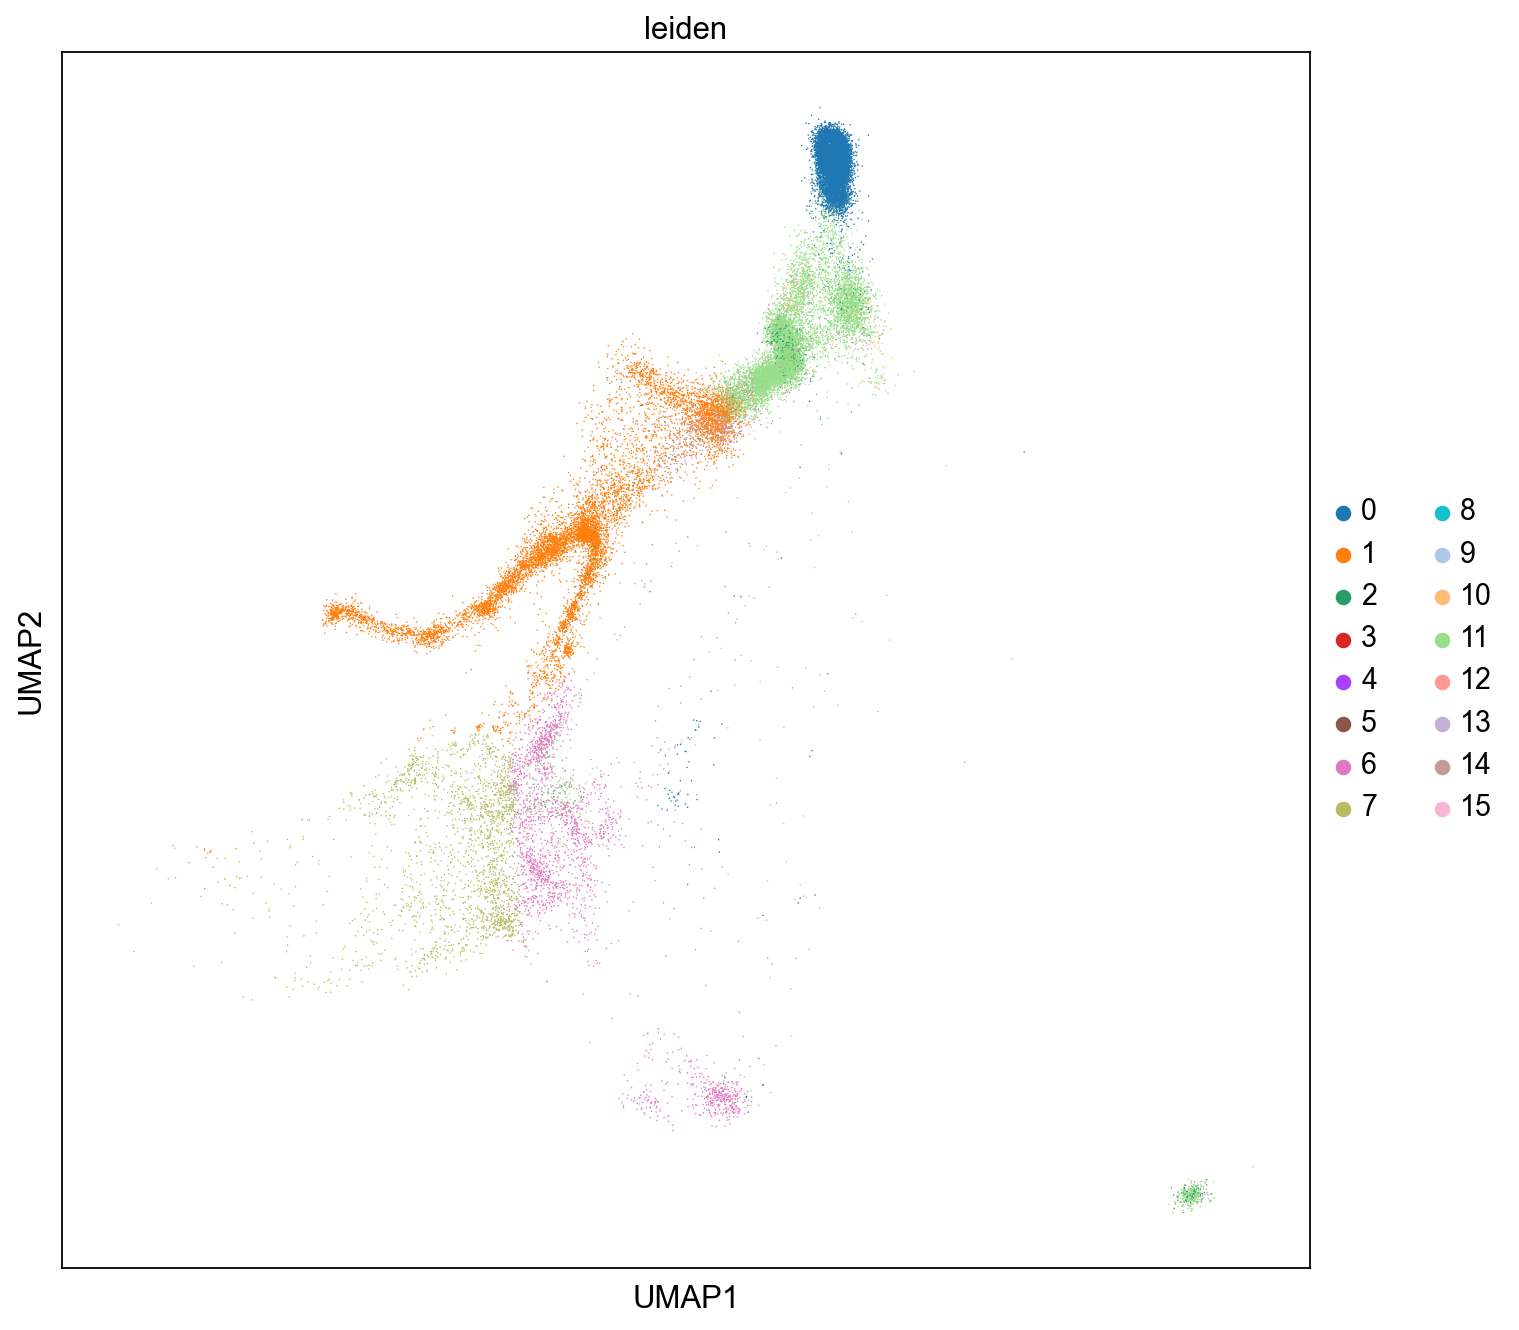

In [49]:
# adata_combined.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors
sc.pl.umap(adata_total, color=['leiden'])


In [51]:
# make new category obs based on index name after -1-
adata_total.obs['sample_type'] = adata_total.obs.index.str.split('-1-').str[1]


In [52]:
adata_concat = adata_ref.concatenate(adata_total, batch_categories=['ref', 'new'])


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [53]:
adata_concat.obs.leiden = adata_concat.obs.leiden.astype('category')
adata_concat.obs.leiden.cat.reorder_categories(adata_ref.obs.leiden.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['leiden_colors'] = adata_ref.uns['leiden_colors']  # fix category colors


/var/folders/tg/d35b8qxd2dsb9362y56zzdg80000gn/T/ipykernel_99389/864276358.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_concat.obs.leiden.cat.reorder_categories(adata_ref.obs.leiden.cat.categories, inplace=True)  # fix category ordering


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


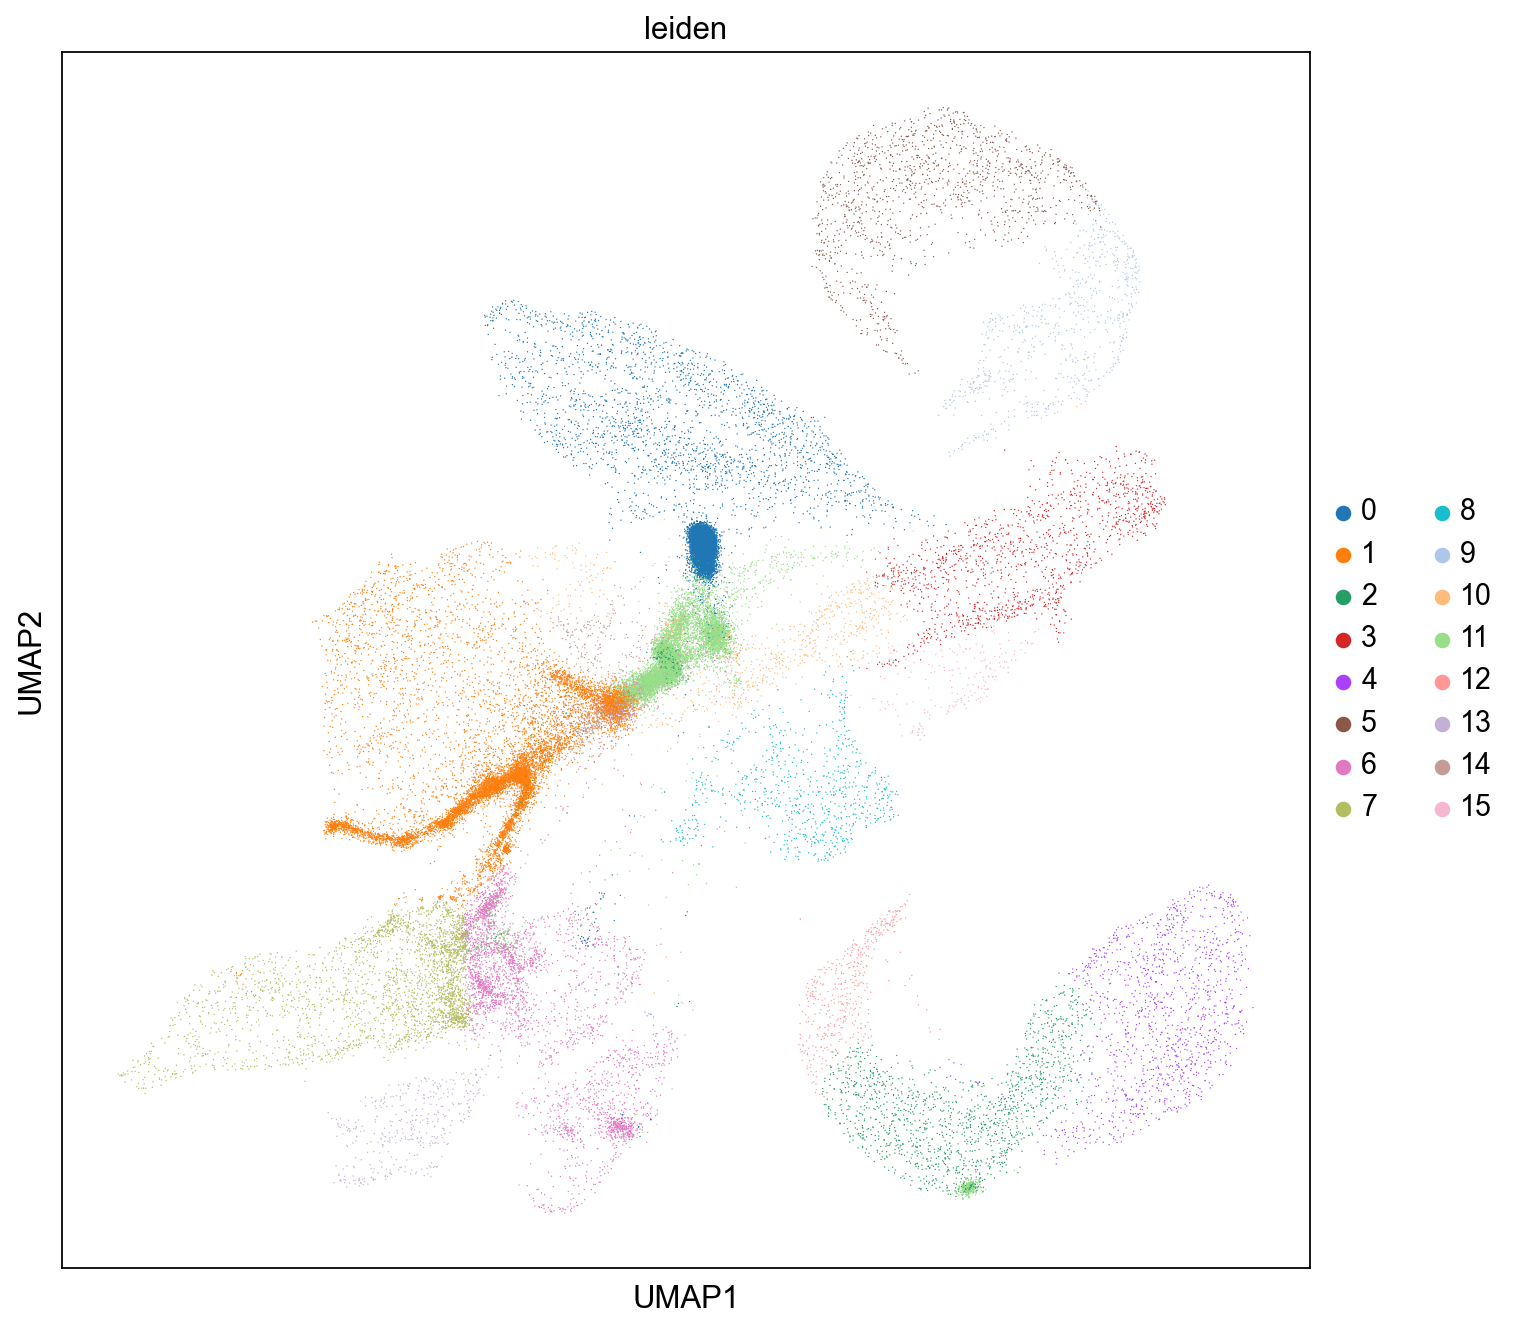

In [56]:
# provide space between the graphs:

# make the image bigger
sc.set_figure_params(dpi=80, facecolor='white', figsize=(10, 10))

# bigger dots

sc.pl.umap(adata_concat, color=['leiden'])
# only show from batch new
# adata_new = adata_concat[adata_concat.obs['batch'] == 'new']
# sc.pl.umap(adata_new, color=['leiden'] , wspace=0.5)



In [25]:
# renormalize and log and neighbours umap adata_new




sc.tl.pca(adata_new, svd_solver='arpack')
sc.pp.neighbors(adata_new, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_new)
sc.tl.leiden(adata_new, resolution=0.5)


computing PCA
    with n_comps=50
    finished (0:00:39)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:40)
running Leiden clustering
    finished: found 37 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:11)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


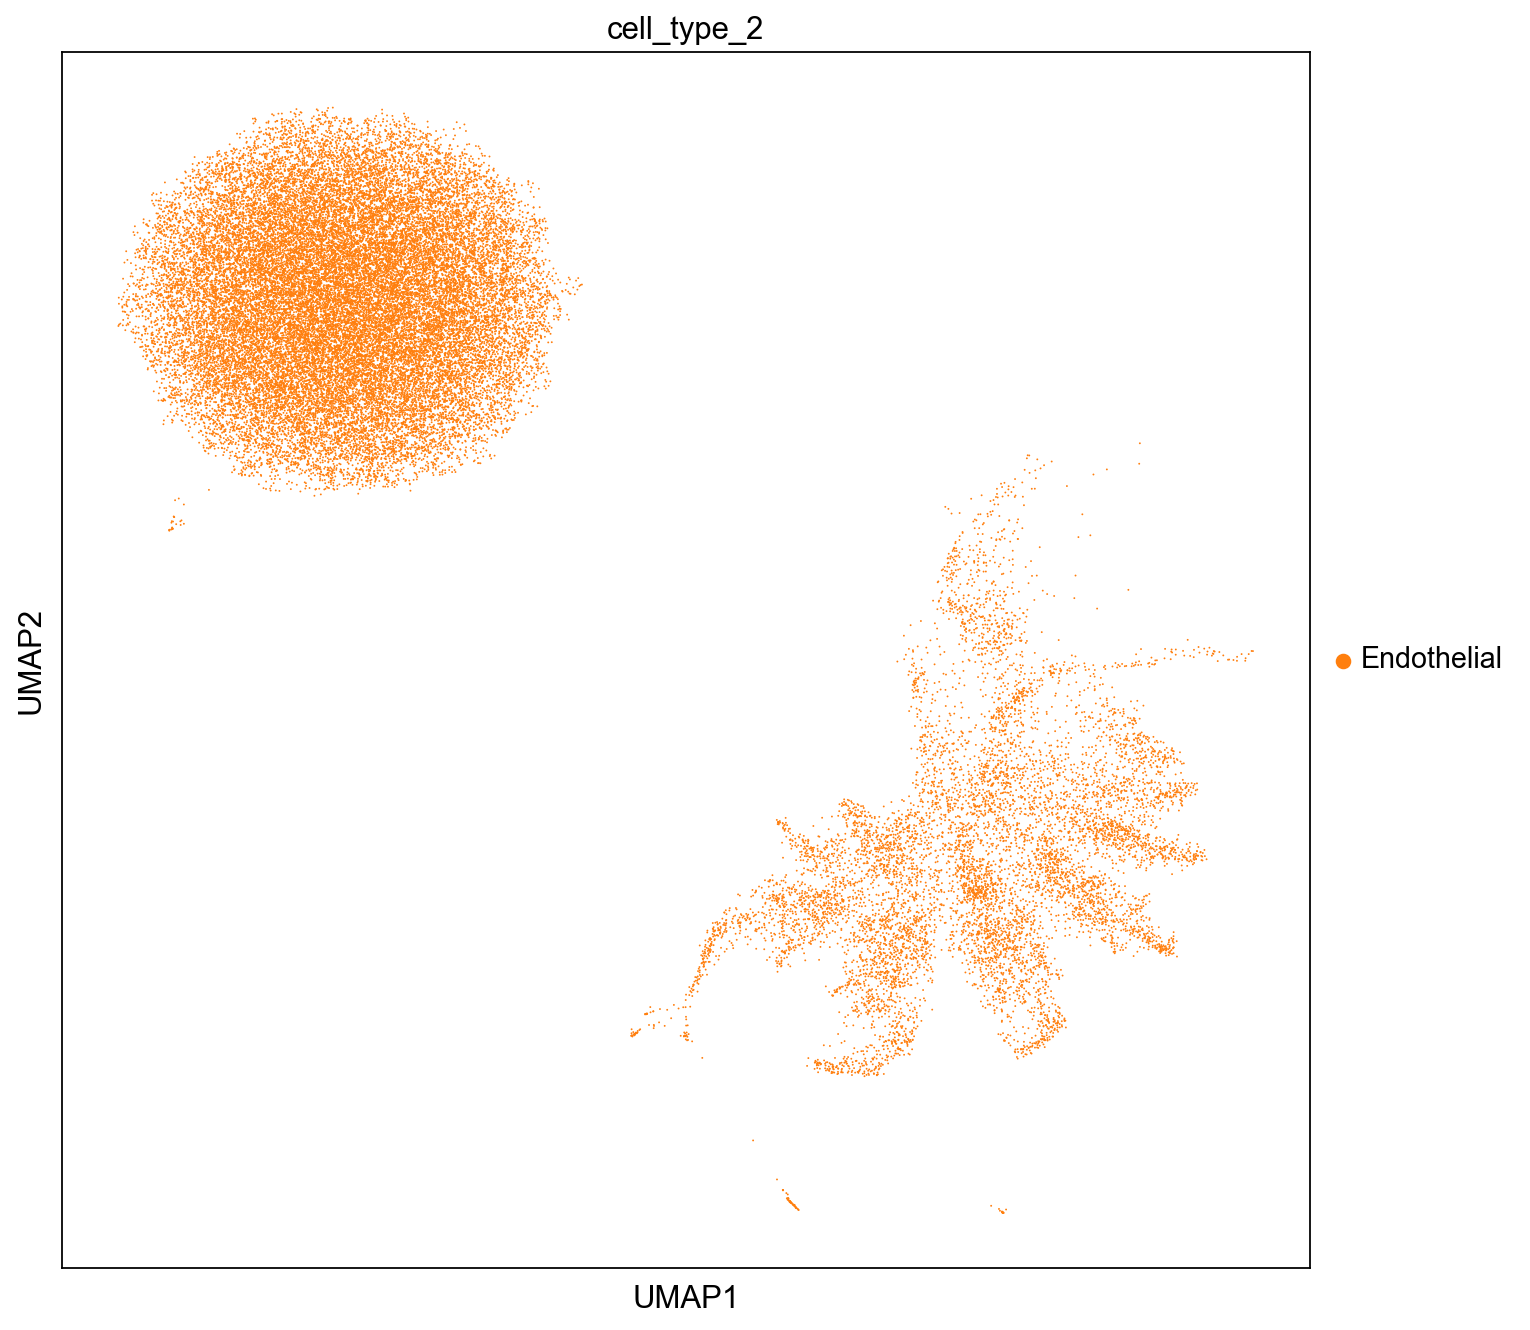

In [36]:
# oligodendrocytle like or endothelial
sc.pl.umap(adata_new[adata_new.obs['cell_type_2'] == 'Endothelial'], color="cell_type_2")
# sc.pl.umap(adata_new, color=['cell_type_2', 'leiden'], wspace=0.5)


In [ ]:
# sc.pl.umap(adata_new, color=['sample_type'], wspace=0.5)
# sc.pp.calculate_qc_metrics(adata_new, inplace=True)
# sc.pp.regress_out(adata_new, ['n_counts', 'percent_mito'])

# sc.pp.scale(adata_new, max_value=10)
# sc.tl.pca(adata_new, svd_solver='arpack')
# sc.pp.neighbors(adata_new, n_neighbors=10, n_pcs=40)
# sc.tl.umap(adata_new)
# sc.tl.leiden(adata_new, resolution=0.5)



cell_type batch louvain  \
AAACCCAAGACATCCT-1-1914_human-1914-new       NaN   new       0   
AAACCCAAGCATGAAT-1-1914_human-1914-new       NaN   new       0   
AAACCCAAGCTAGATA-1-1914_human-1914-new       NaN   new       0   
AAACCCAAGTCCTGCG-1-1914_human-1914-new       NaN   new       0   
AAACCCACAAAGGAGA-1-1914_human-1914-new       NaN   new       1   
...                                          ...   ...     ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new        NaN   new       0   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new        NaN   new       0   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new        NaN   new       0   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new        NaN   new       0   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new        NaN   new       0   

                                            sample_type  \
AAACCCAAGACATCCT-1-1914_human-1914-new  1914_human-1914   
AAACCCAAGCATGAAT-1-1914_human-1914-new  1914_human-1914   
AAACCCAAGCTAGATA-1-1914_human-1914-new  1914_human-1914   
AAACCCAAGTCCTGCG-1-1914_human-1914-new  1914_human-1914   
AAACCCACAAAGGAGA-1-1914_human-1914-new  1914_human-1914   
...                                                 ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new    1919d_rat-1919   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new    1919d_rat-1919   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new    1919d_rat-1919   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new    1919d_rat-1919   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new    1919d_rat-1919   

                                                     cell_type_2 leiden  
AAACCCAAGACATCCT-1-1914_human-1914-new               Endothelial      2  
AAACCCAAGCATGAAT-1-1914_human-1914-new               Endothelial      2  
AAACCCAAGCTAGATA-1-1914_human-1914-new               Endothelial      2  
AAACCCAAGTCCTGCG-1-1914_human-1914-new               Endothelial      2  
AAACCCACAAAGGAGA-1-1914_human-1914-new  Stem Cells (Mesenchymal)      1  
...                                                          ...    ...  
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new                Endothelial      0  
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new                Endothelial      0  
TTTGTTGTCCATACTT-1-1919d_rat-1919-new                Endothelial      0  
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new                Endothelial      0  
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new                Endothelial      0  

[66652 rows x 6 columns]

0


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


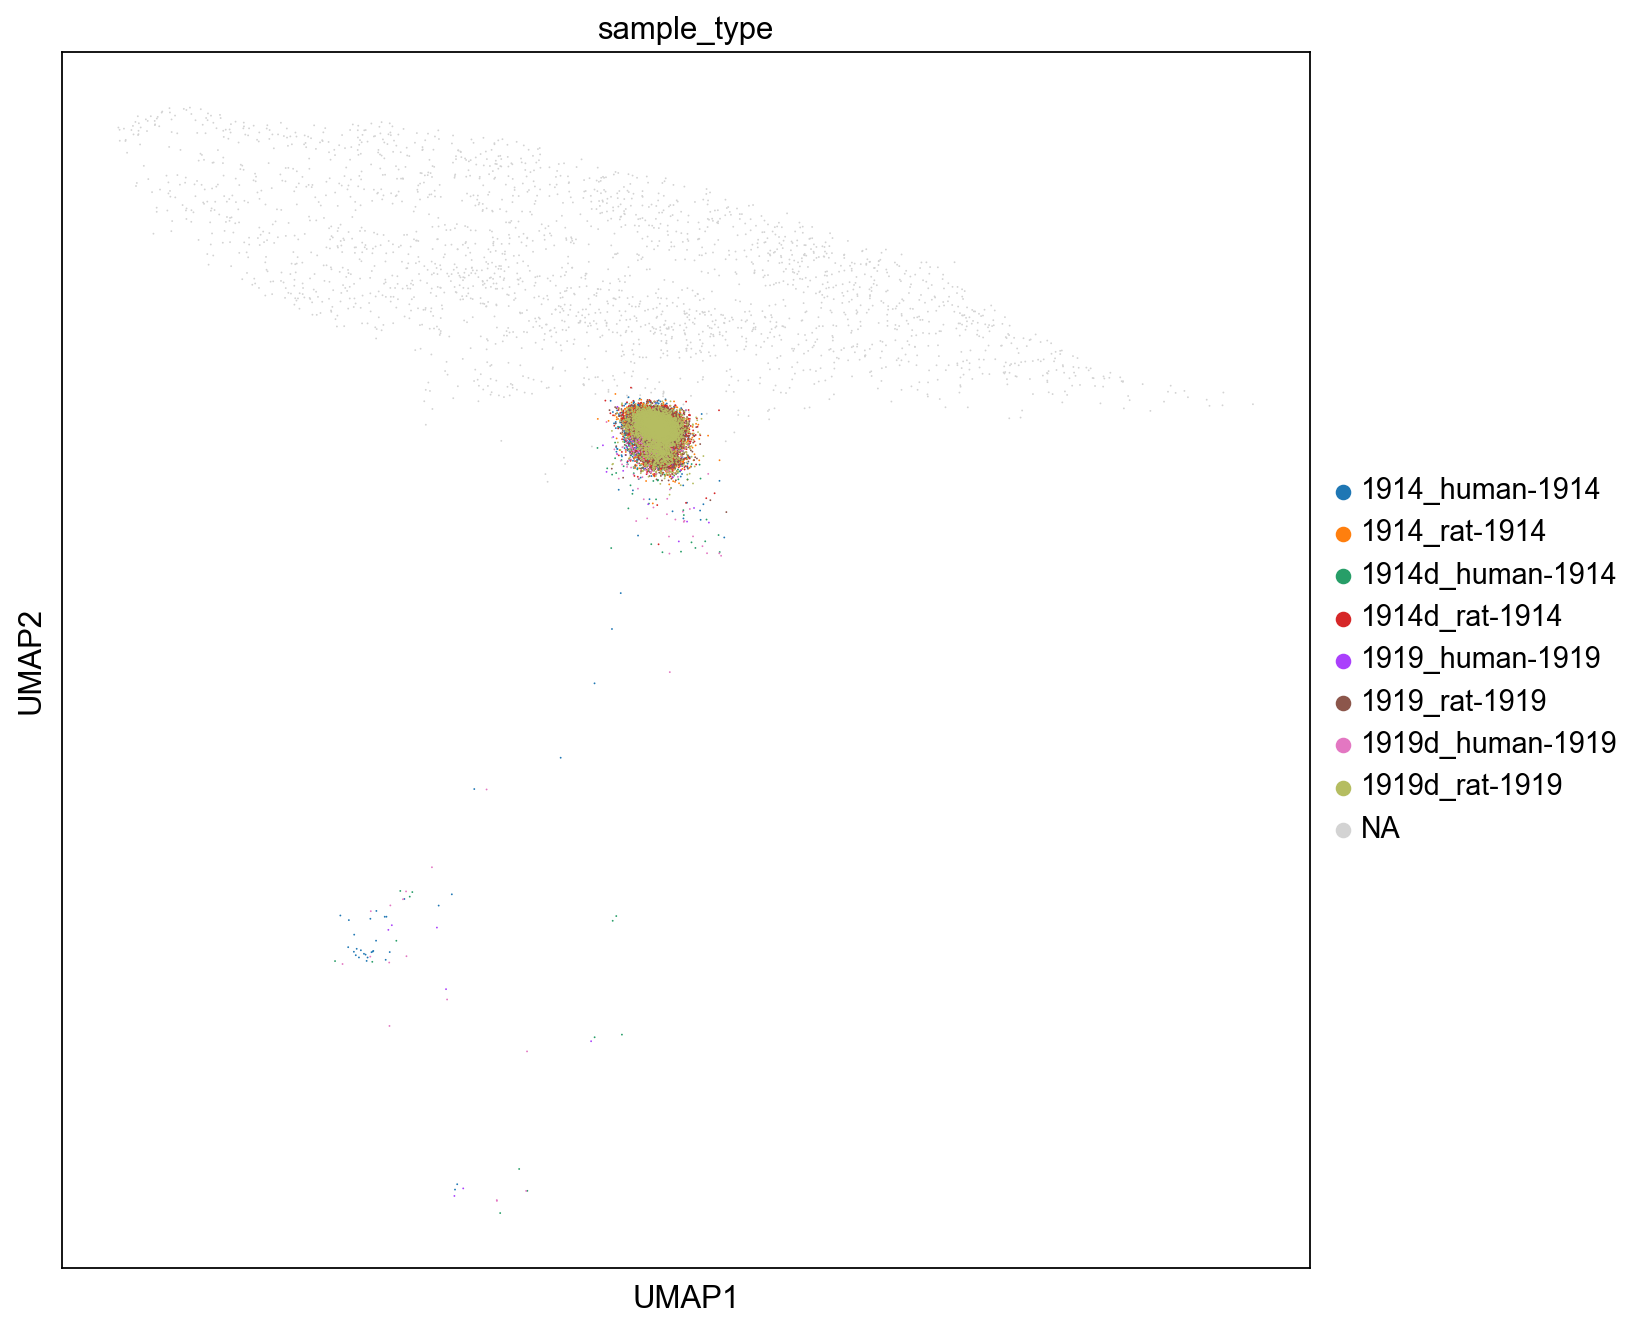

1


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


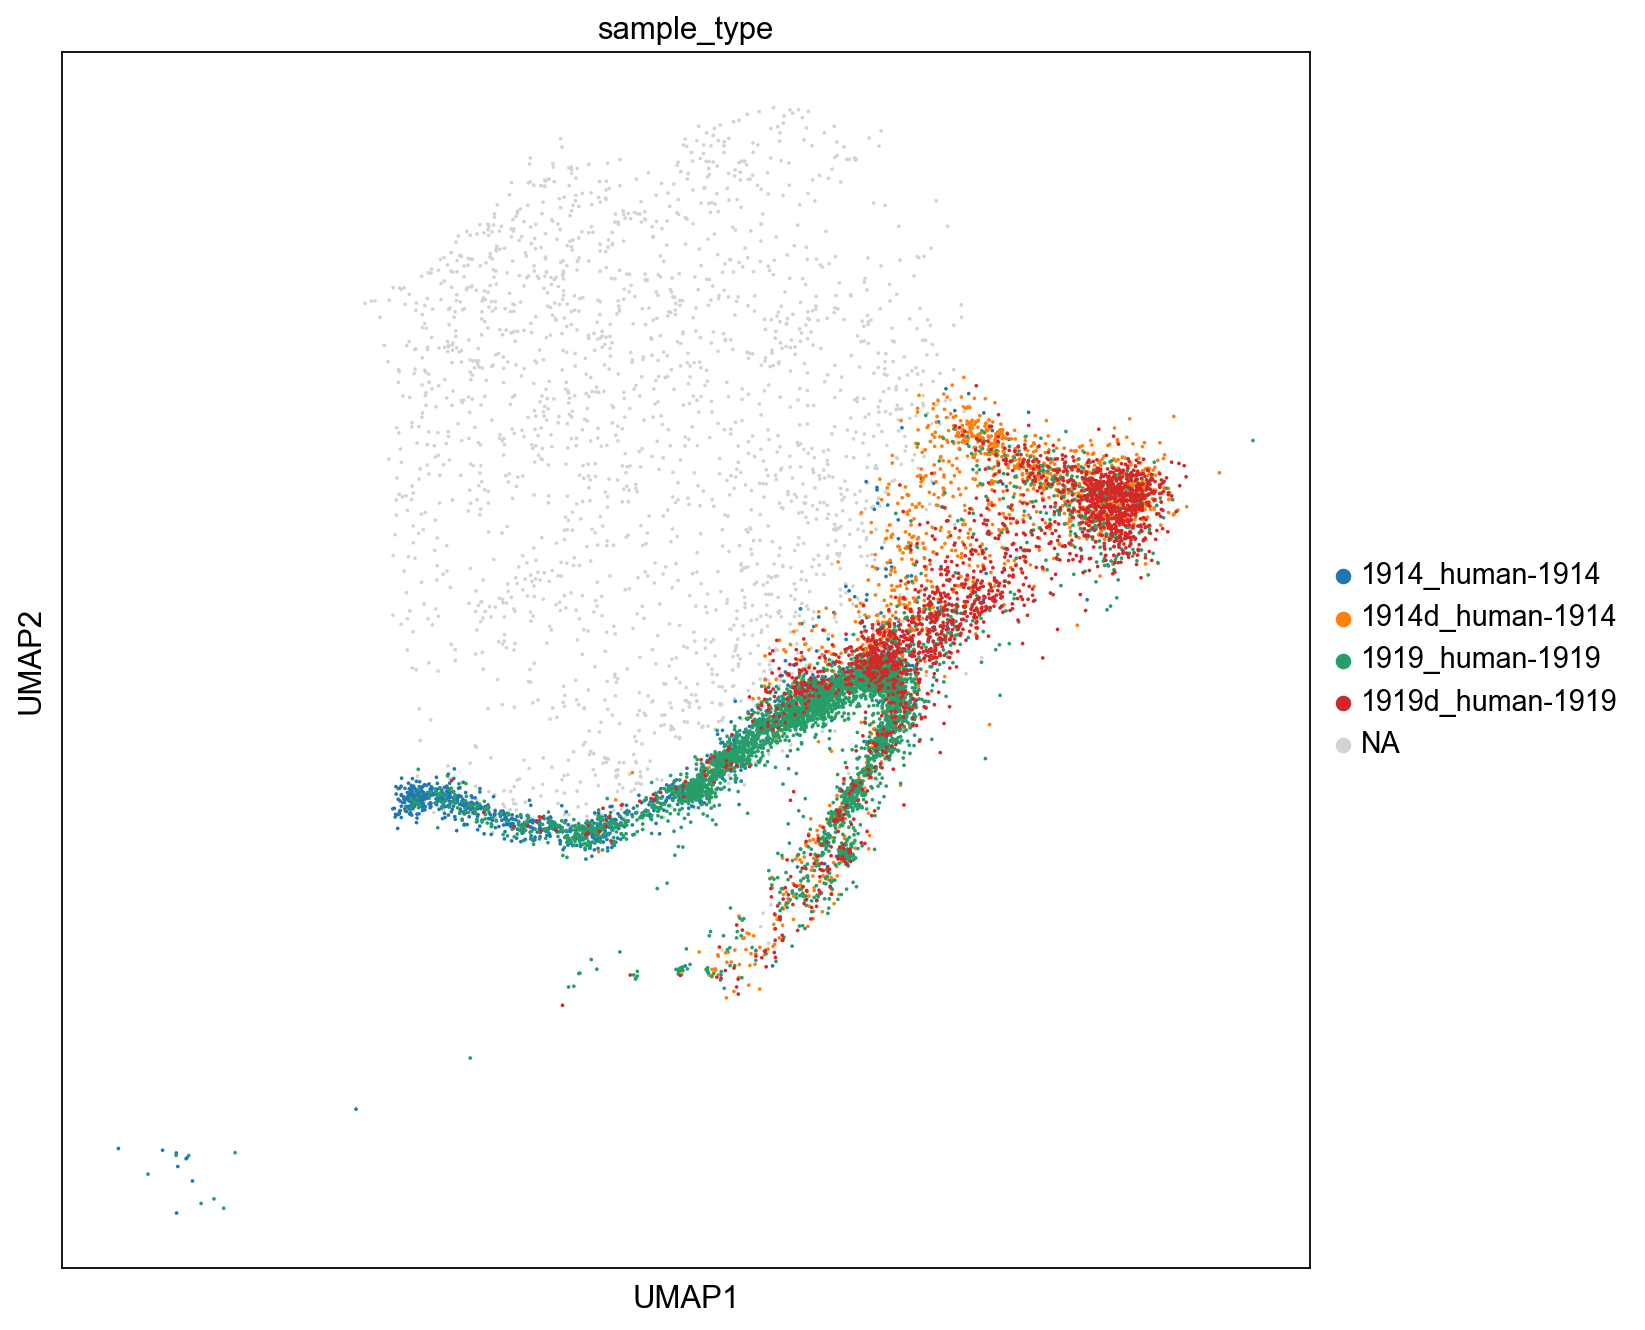

2


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


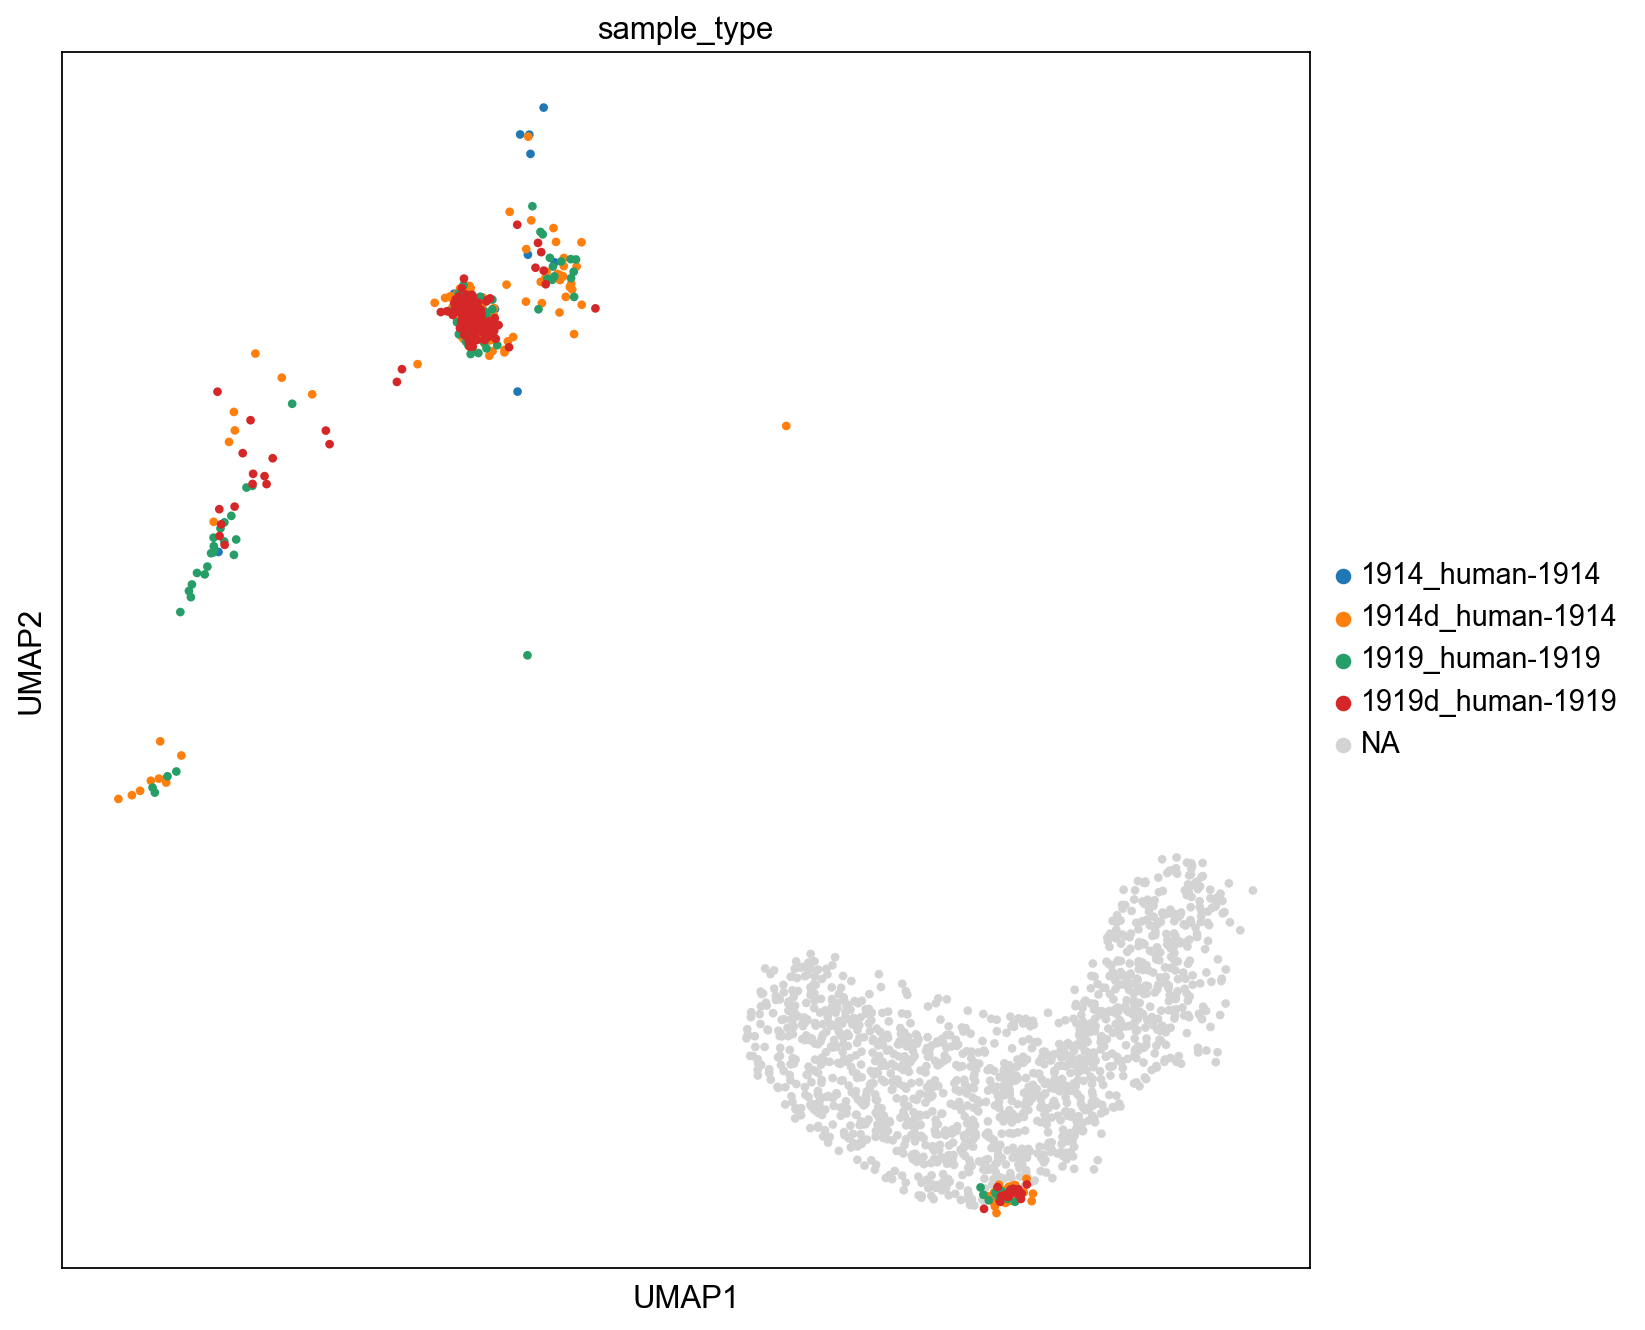

3


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


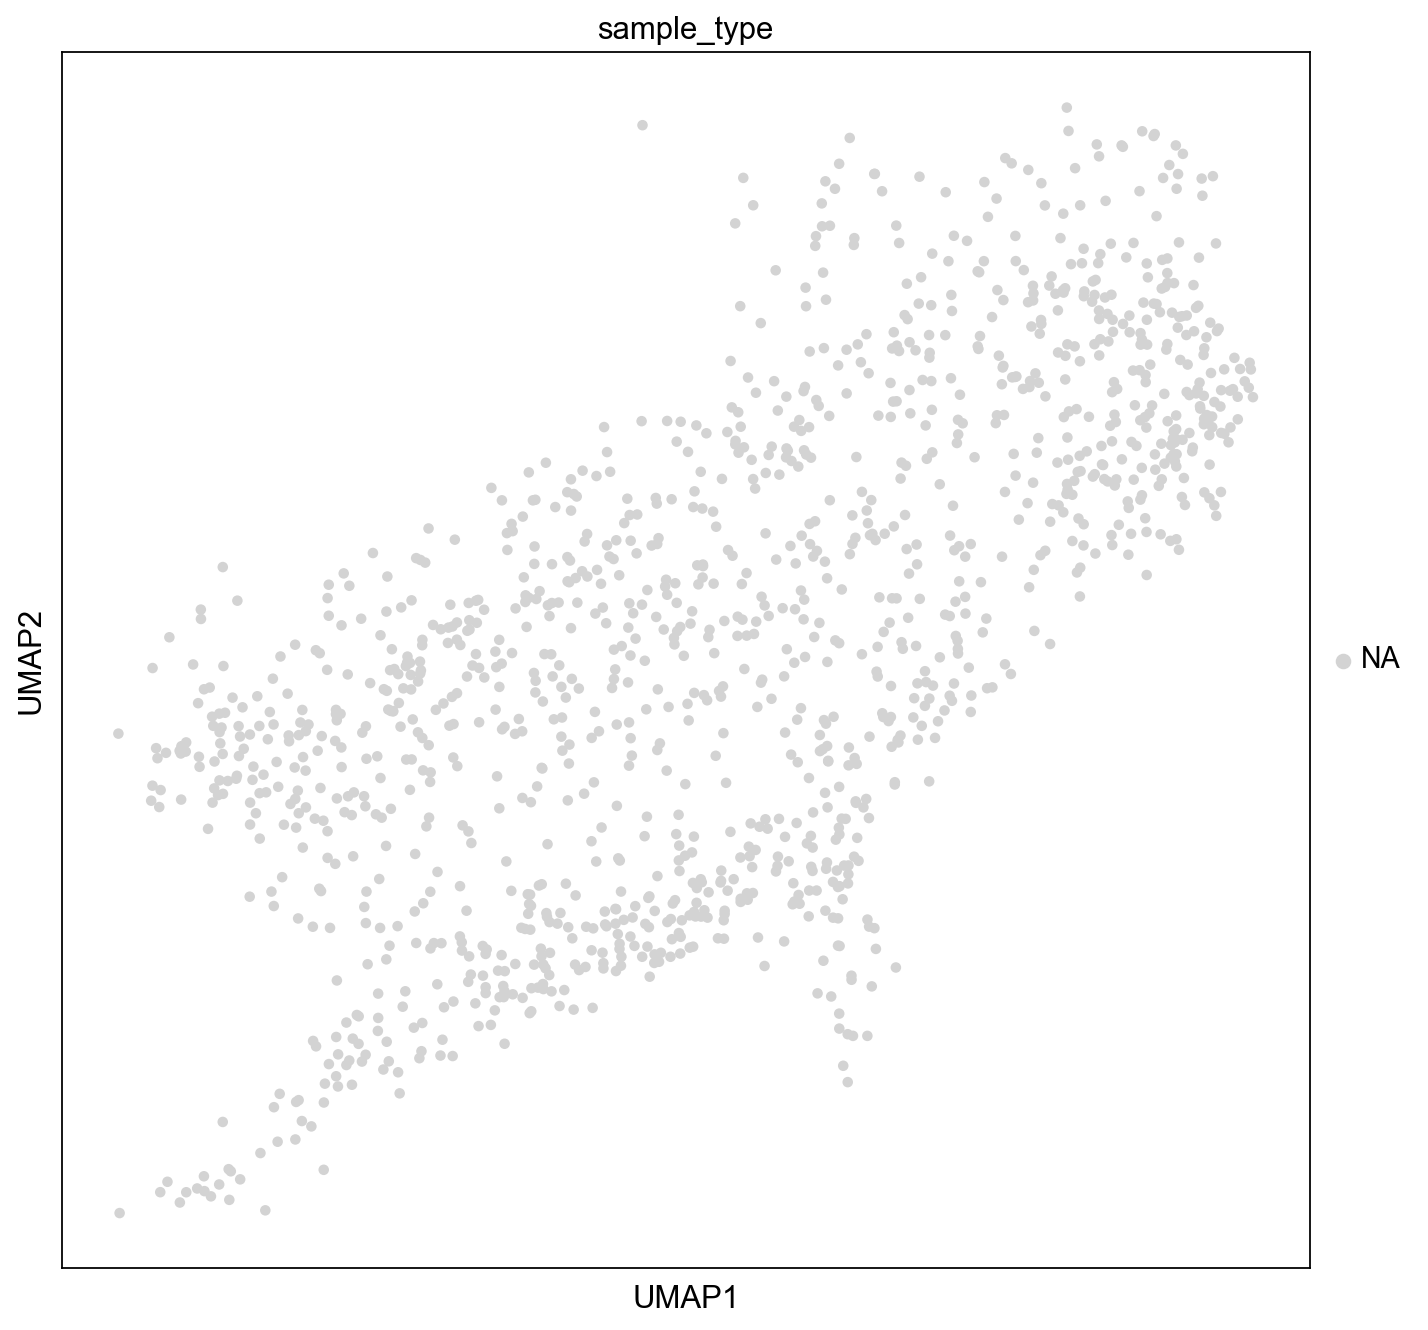

4


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


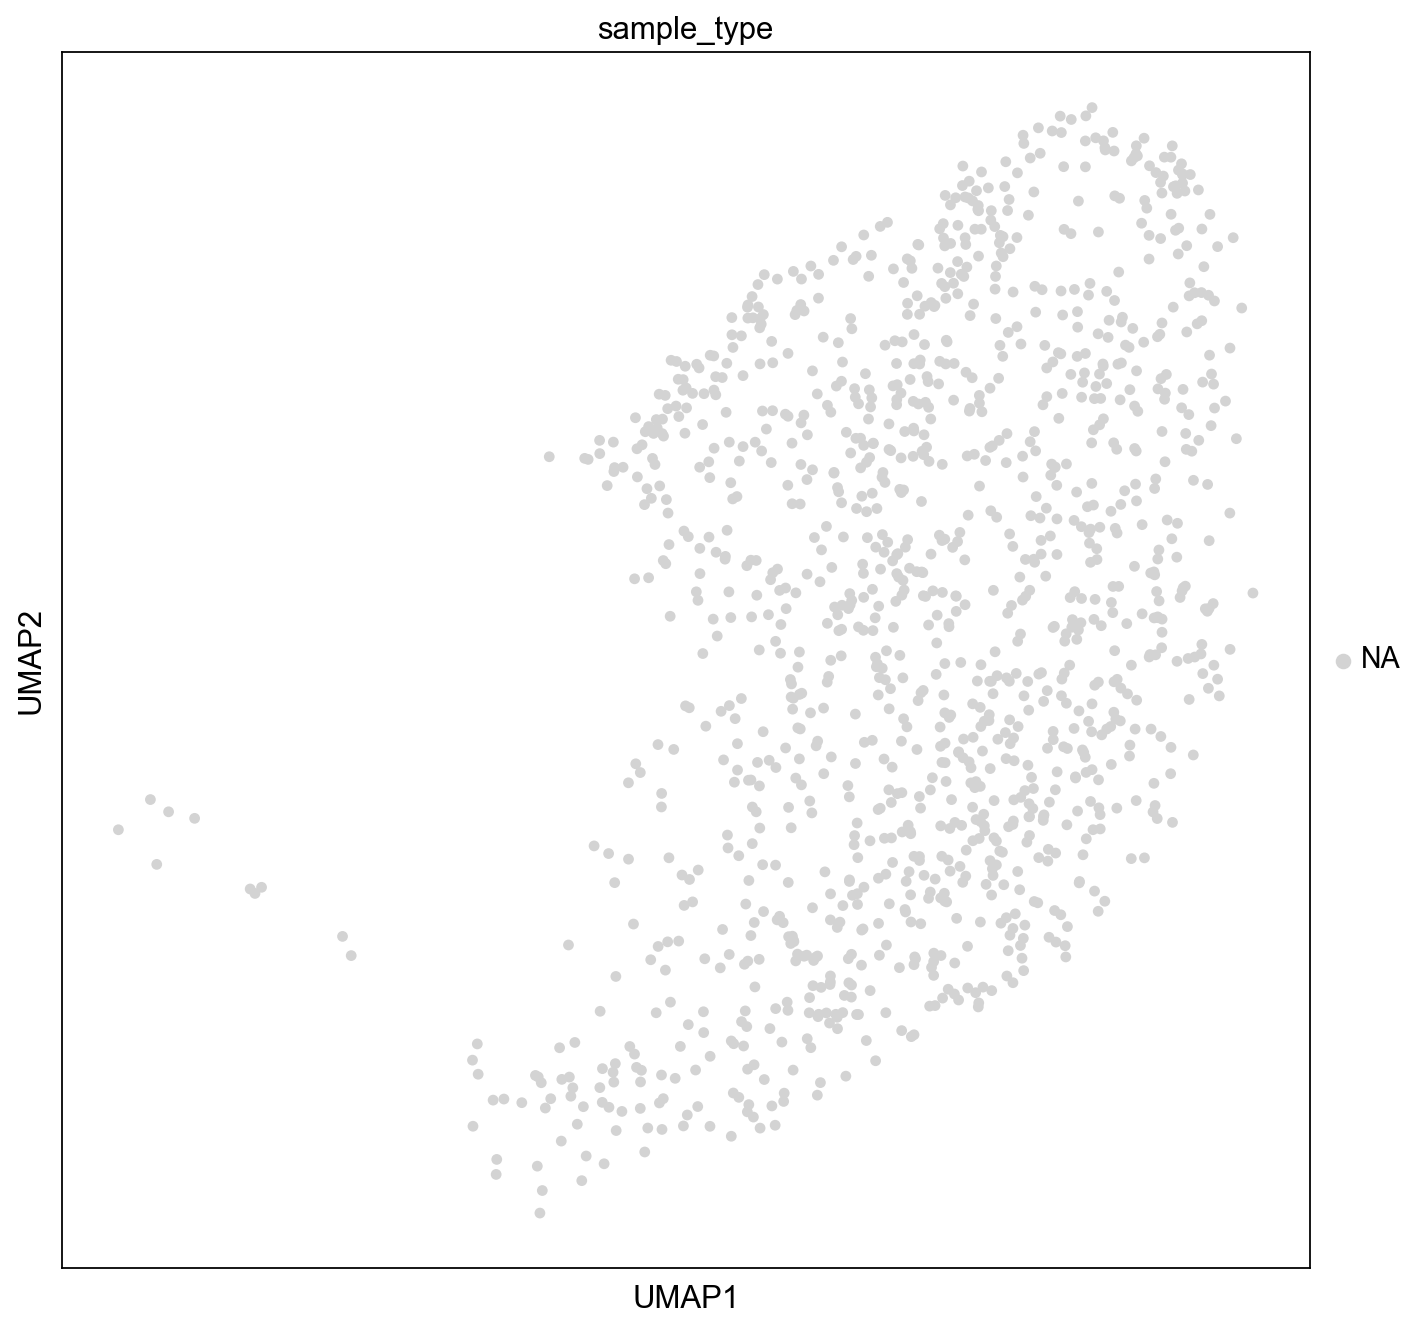

5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


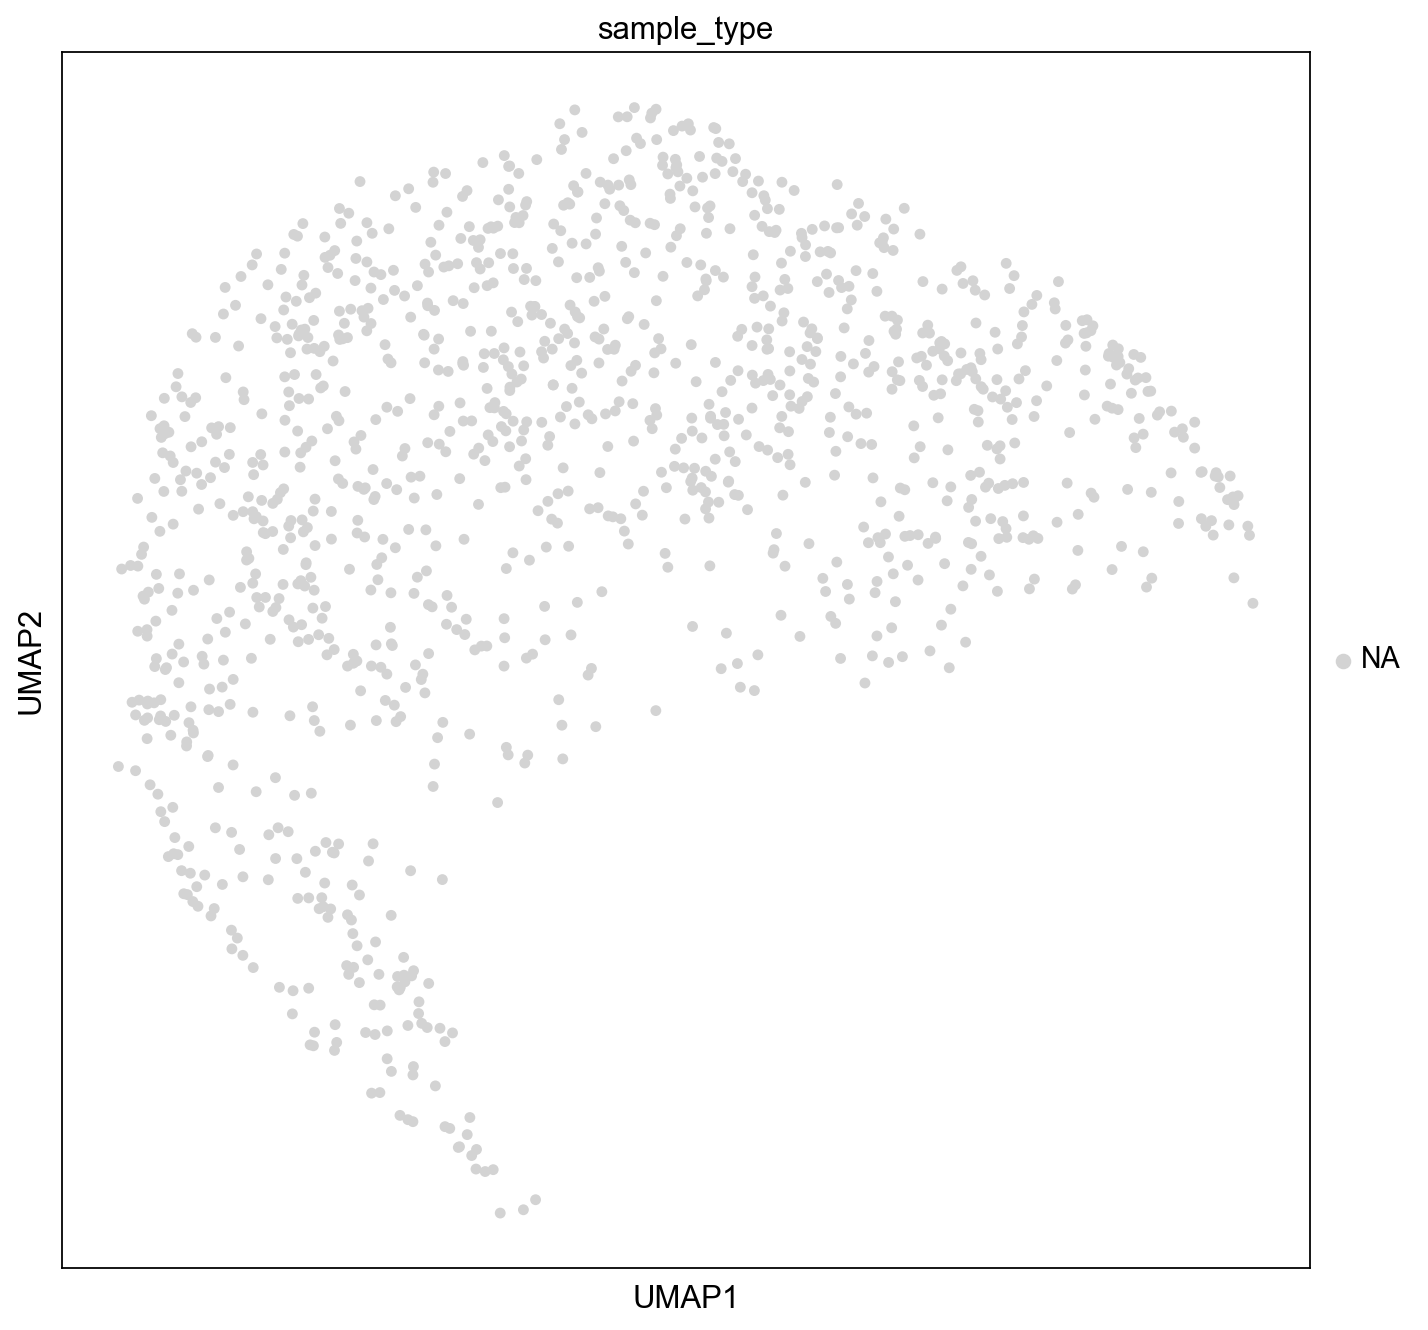

6


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


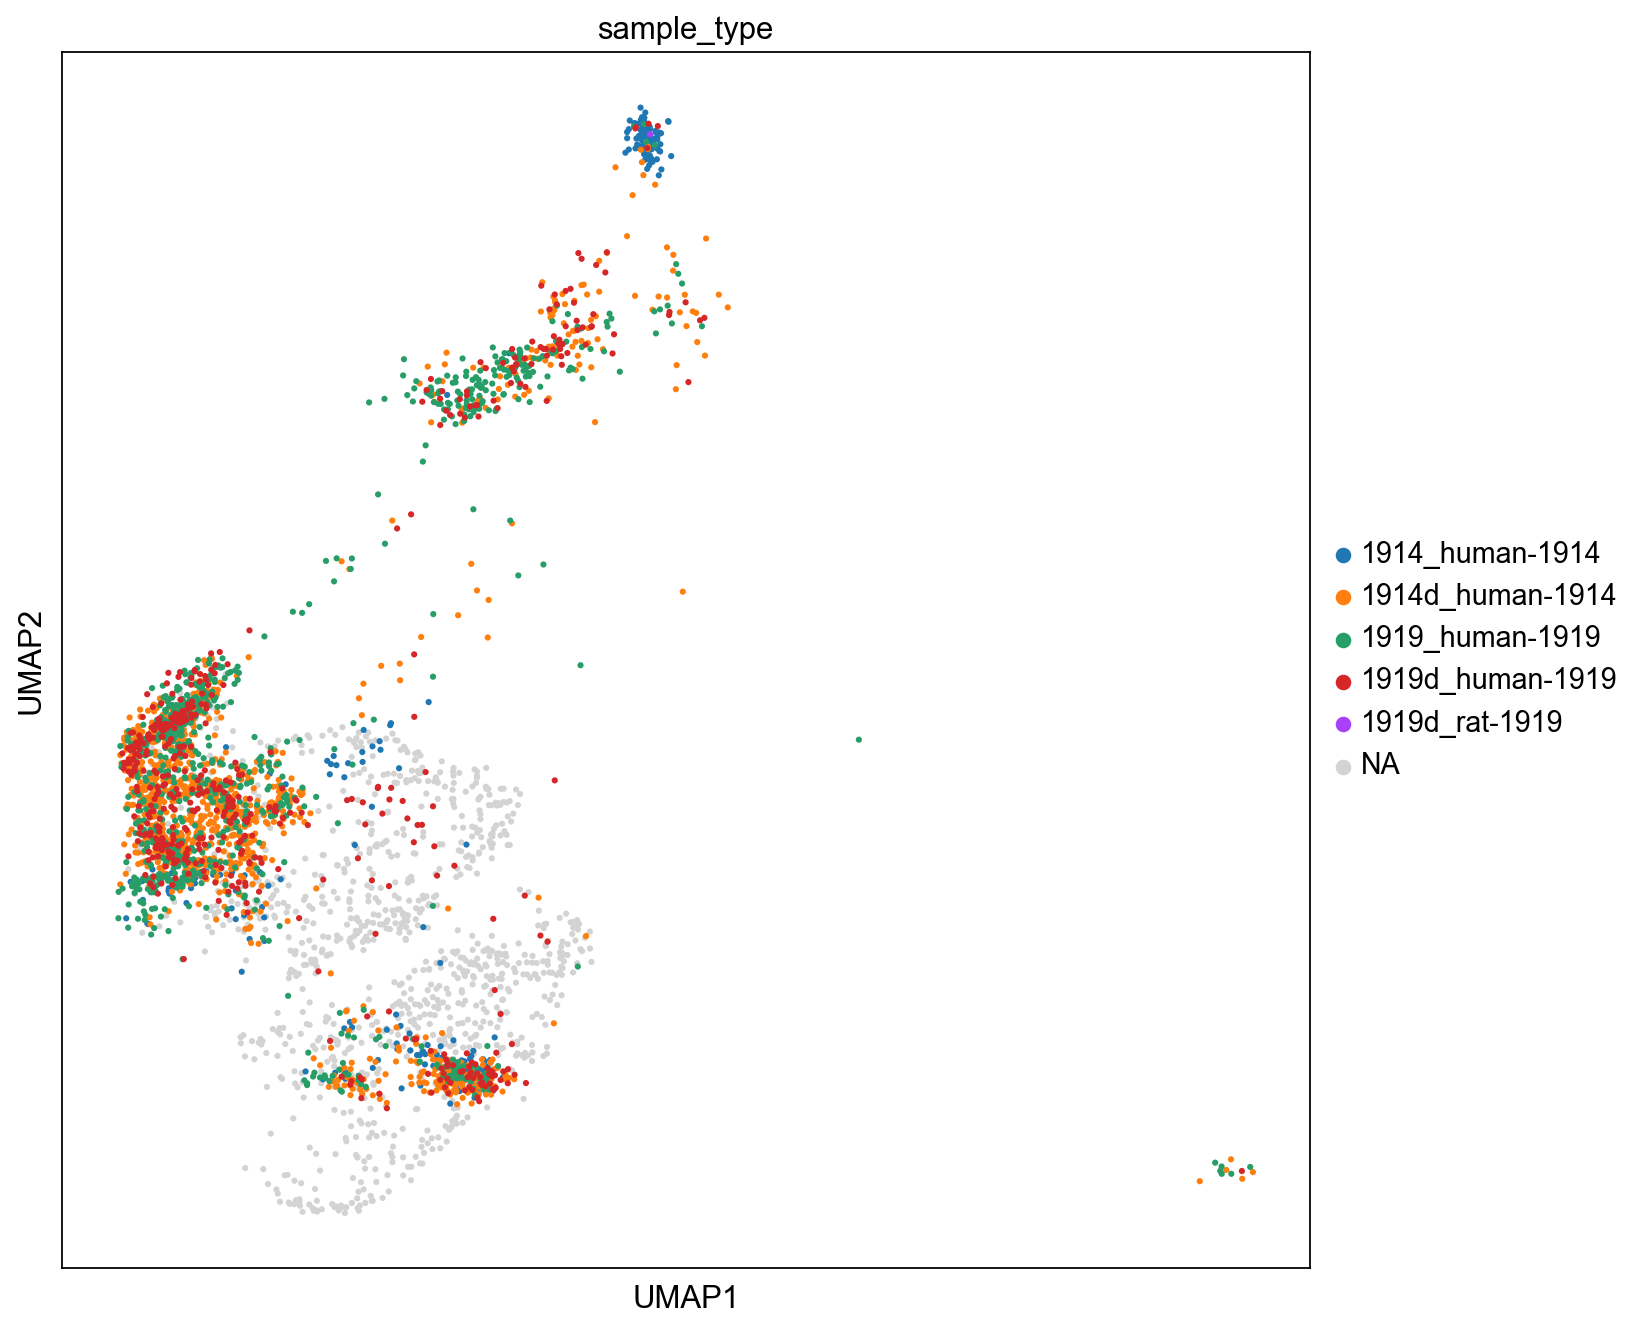

7


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


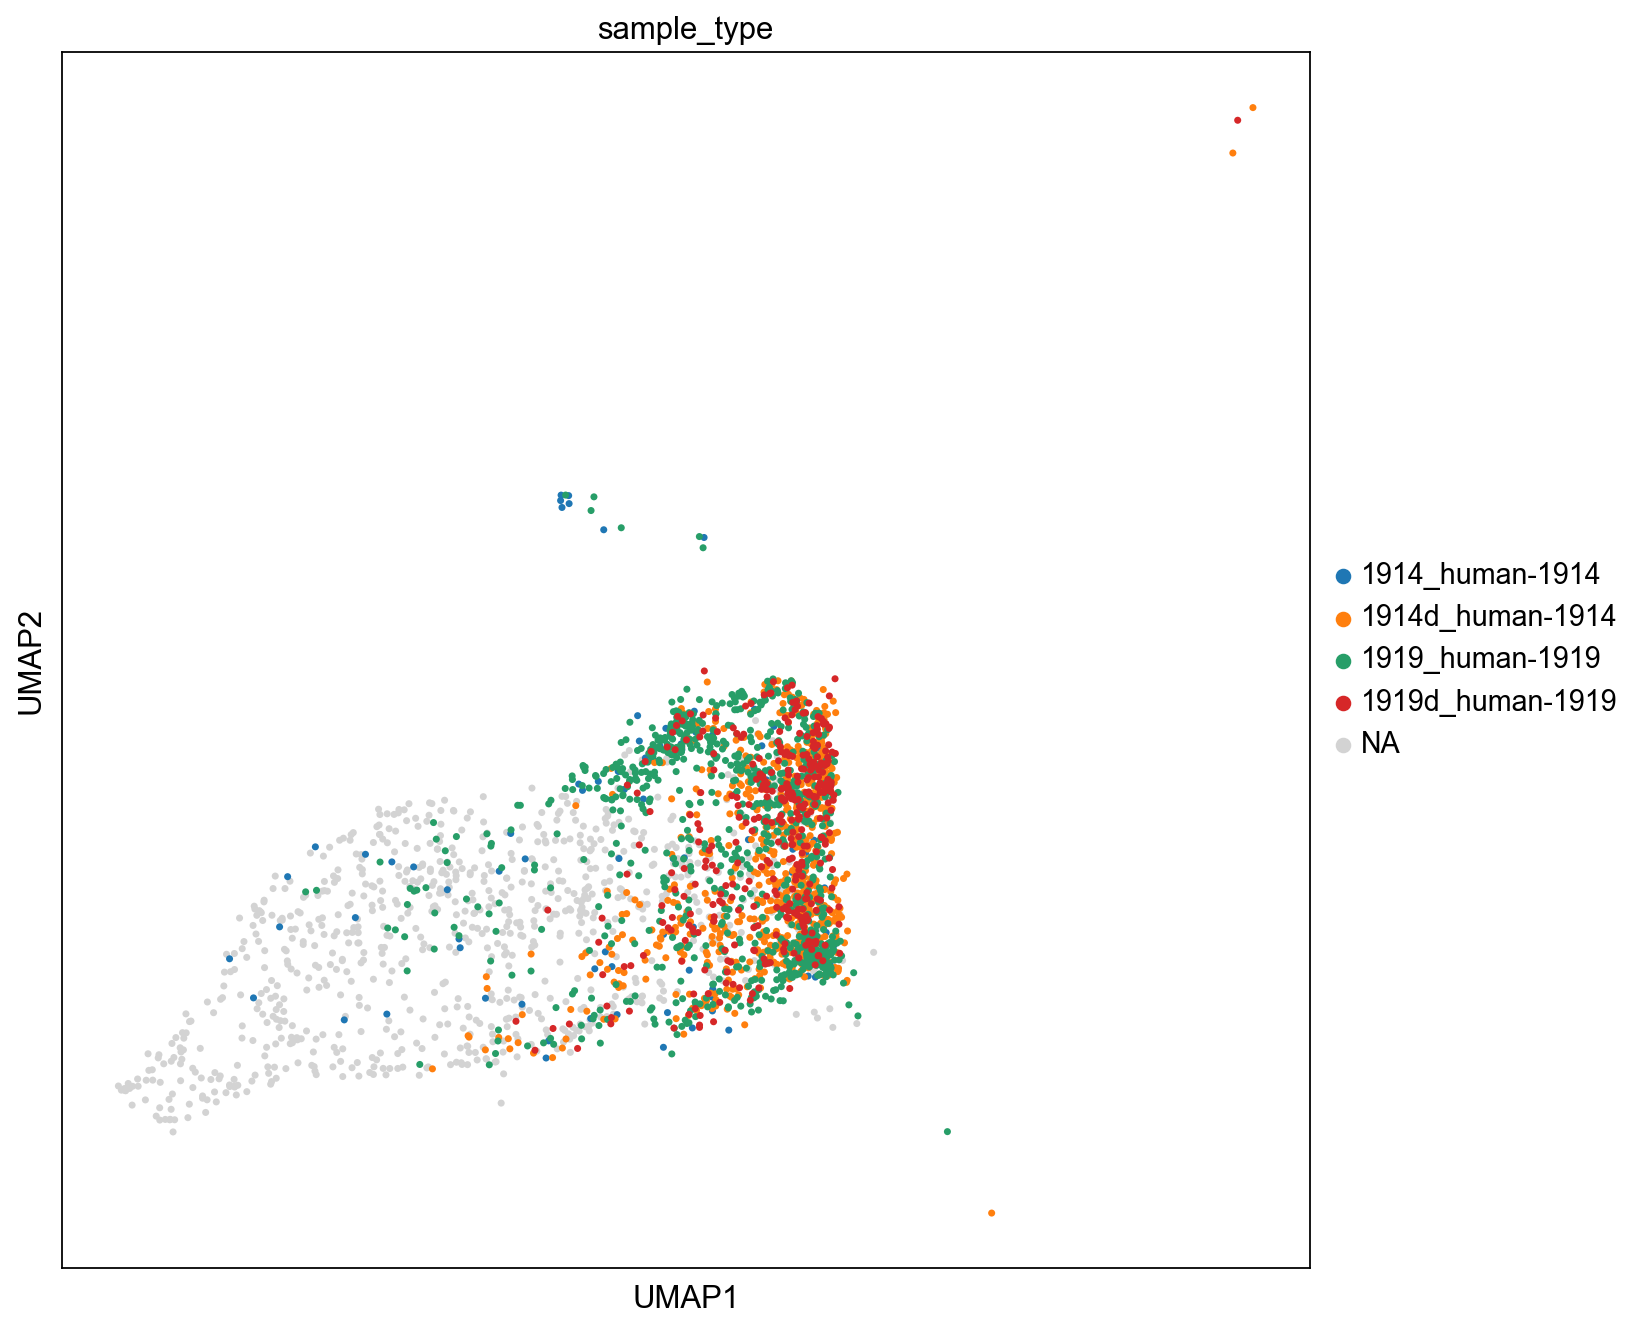

8


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


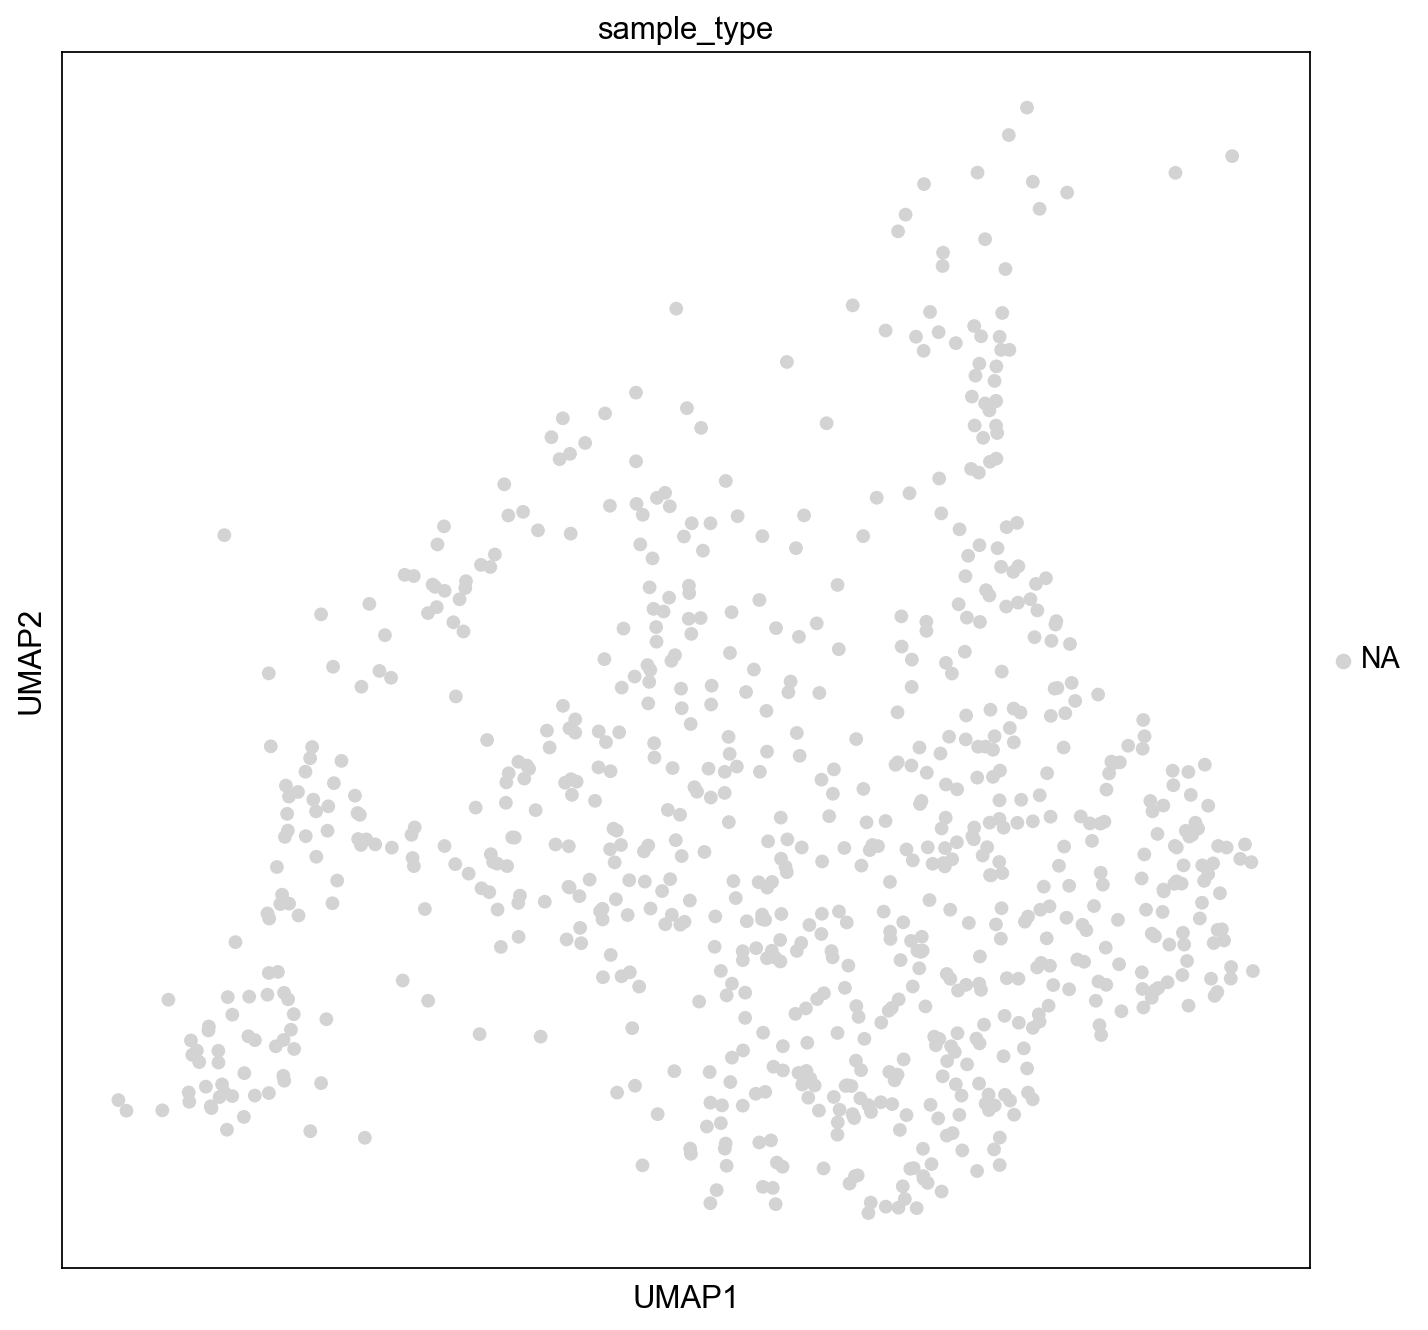

9


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


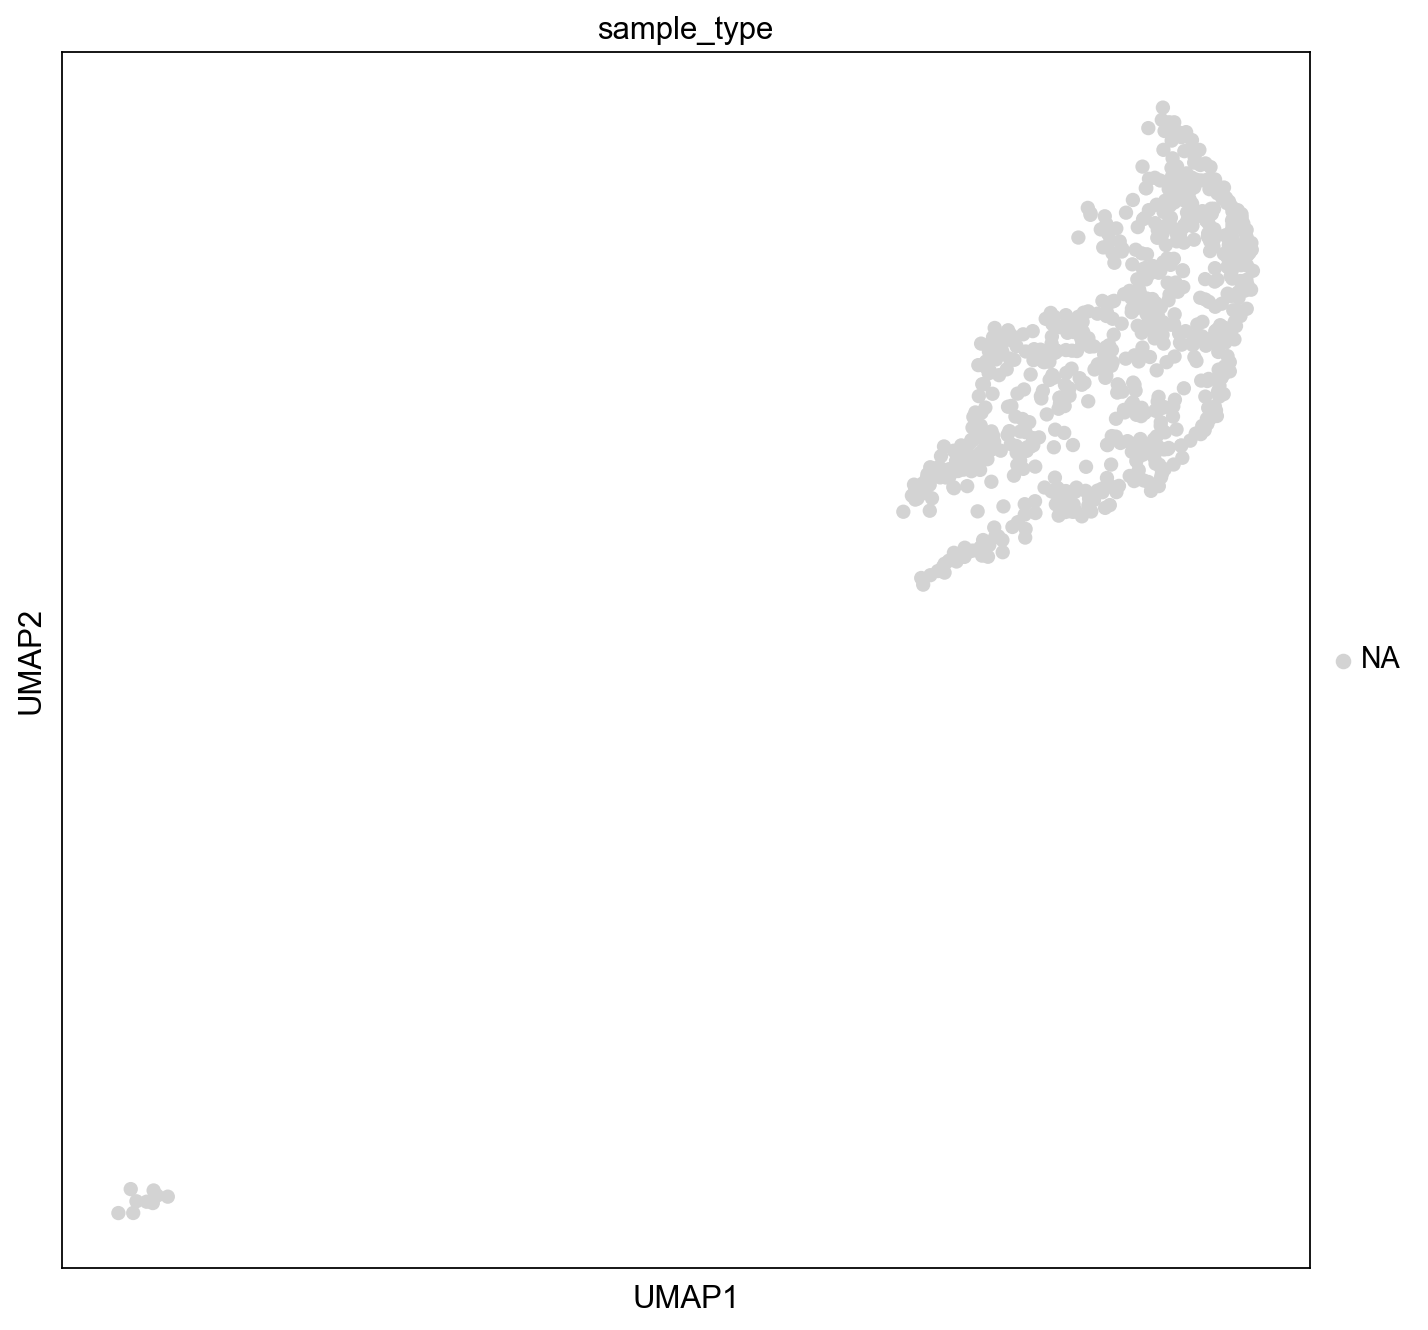

10


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


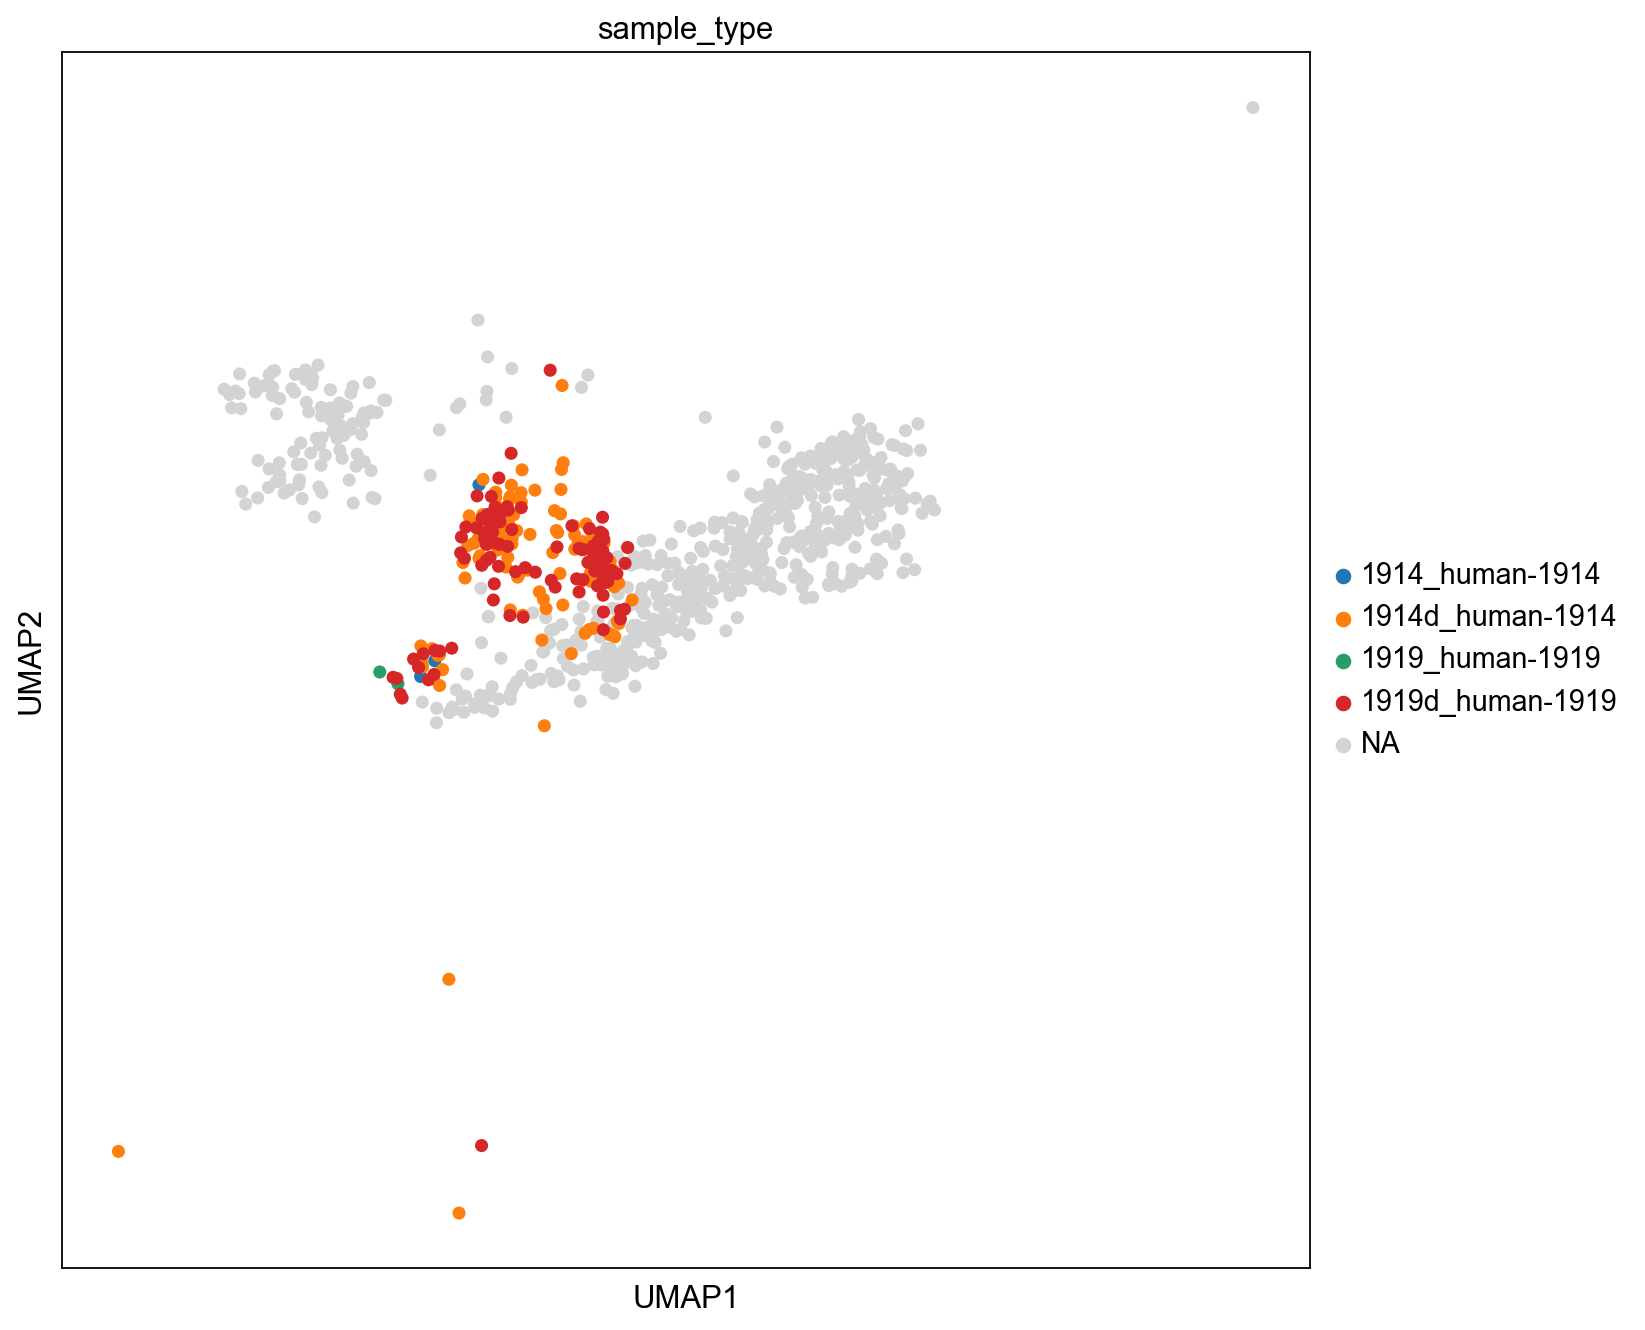

11


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


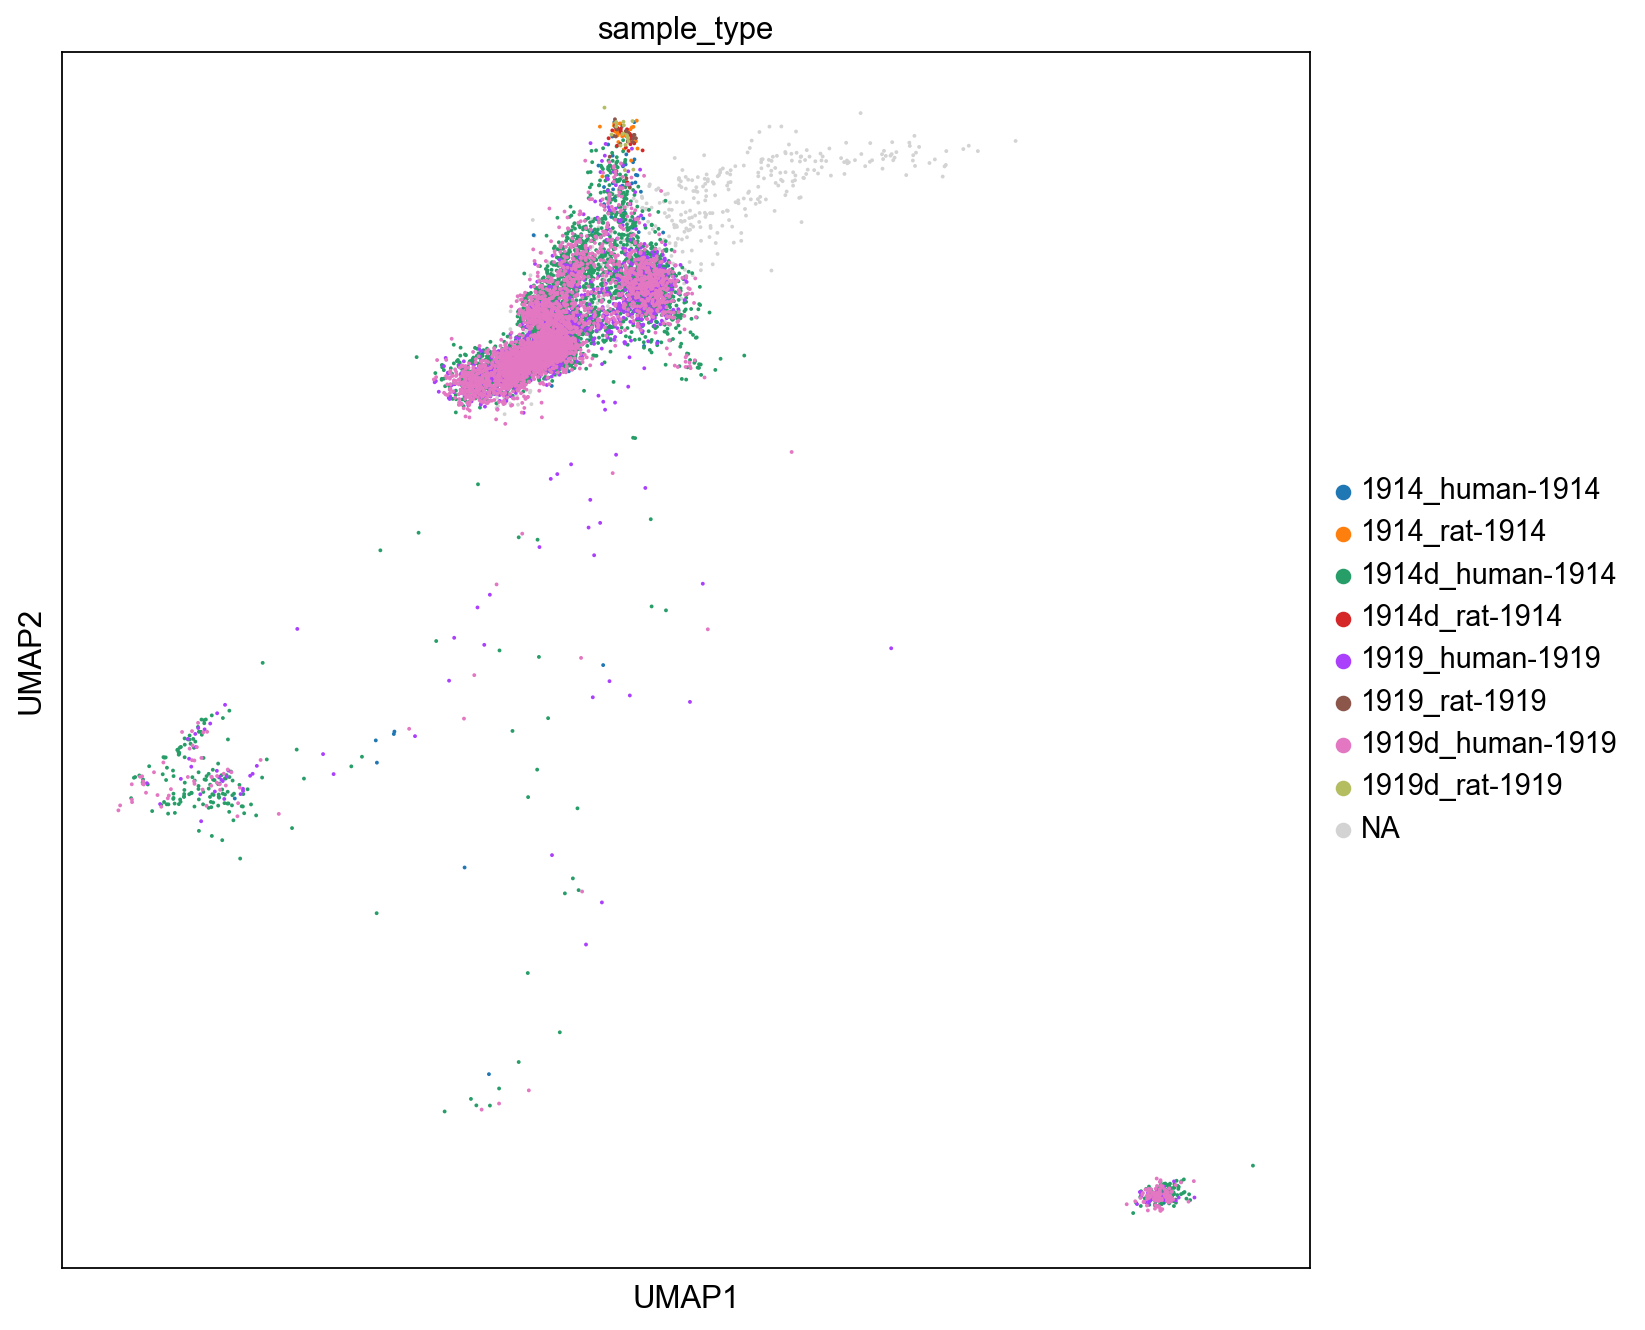

12


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


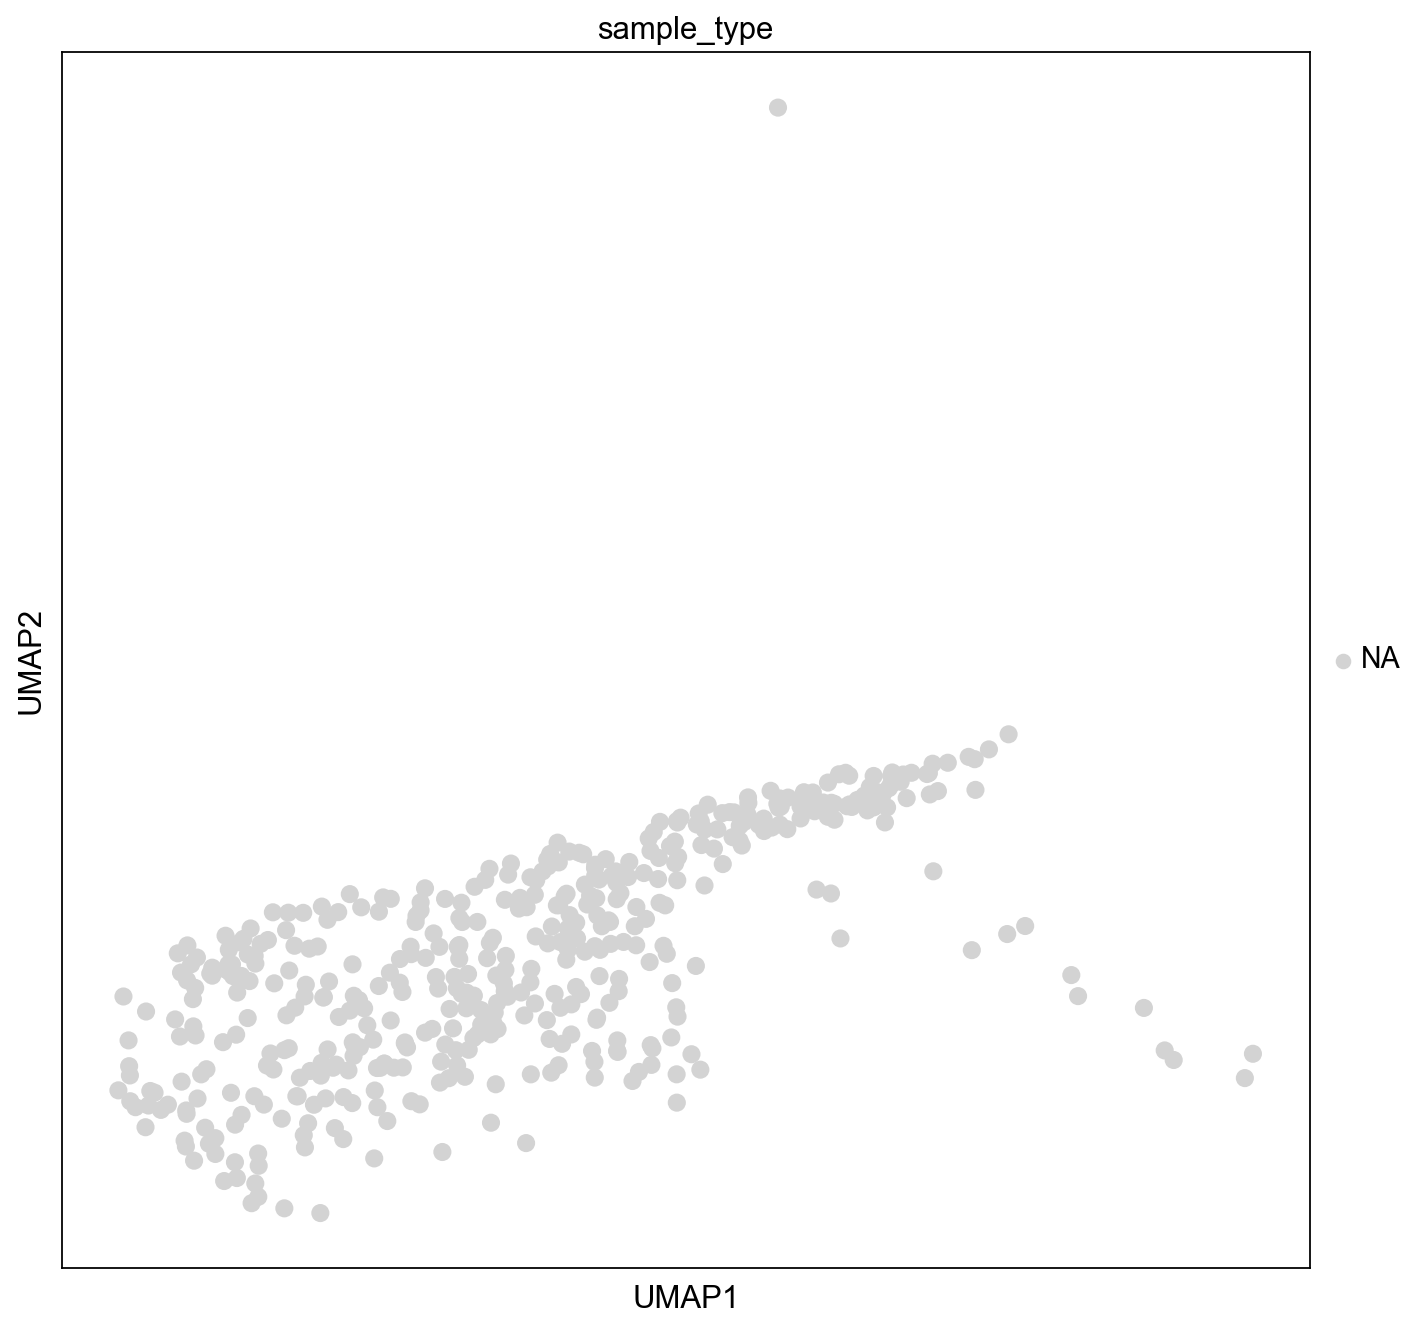

13


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


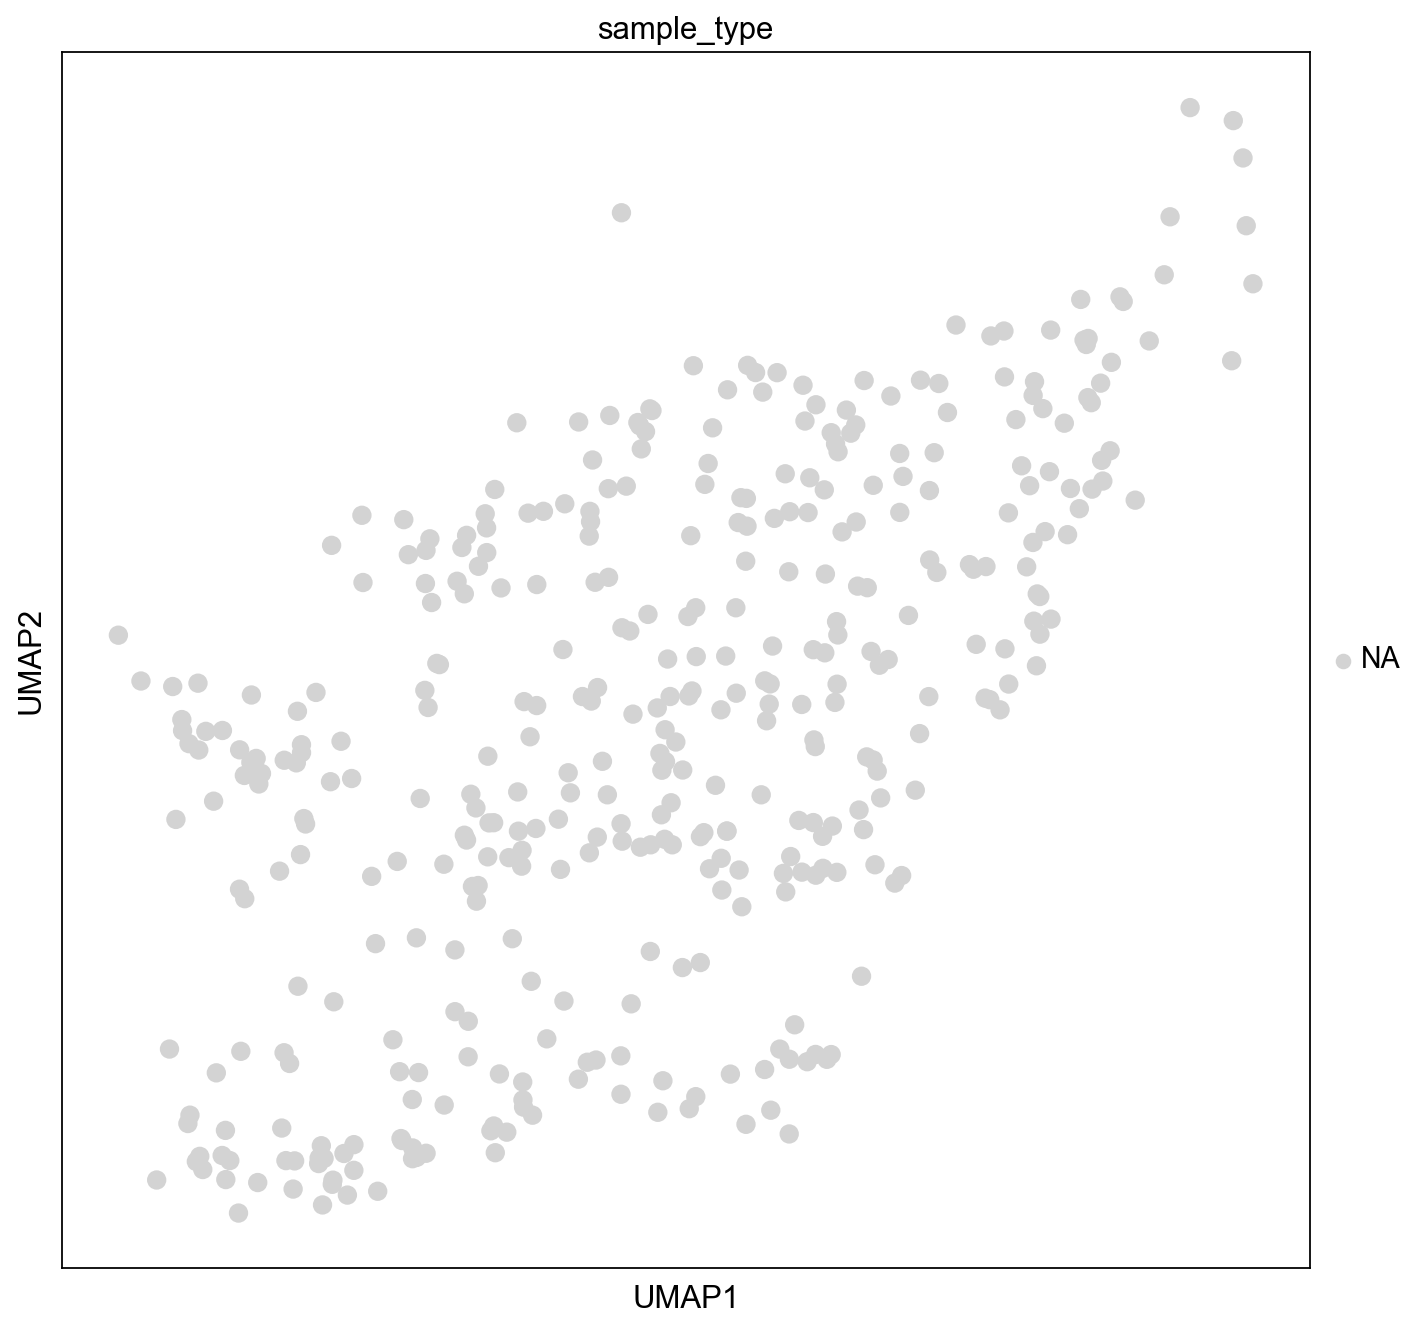

14


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


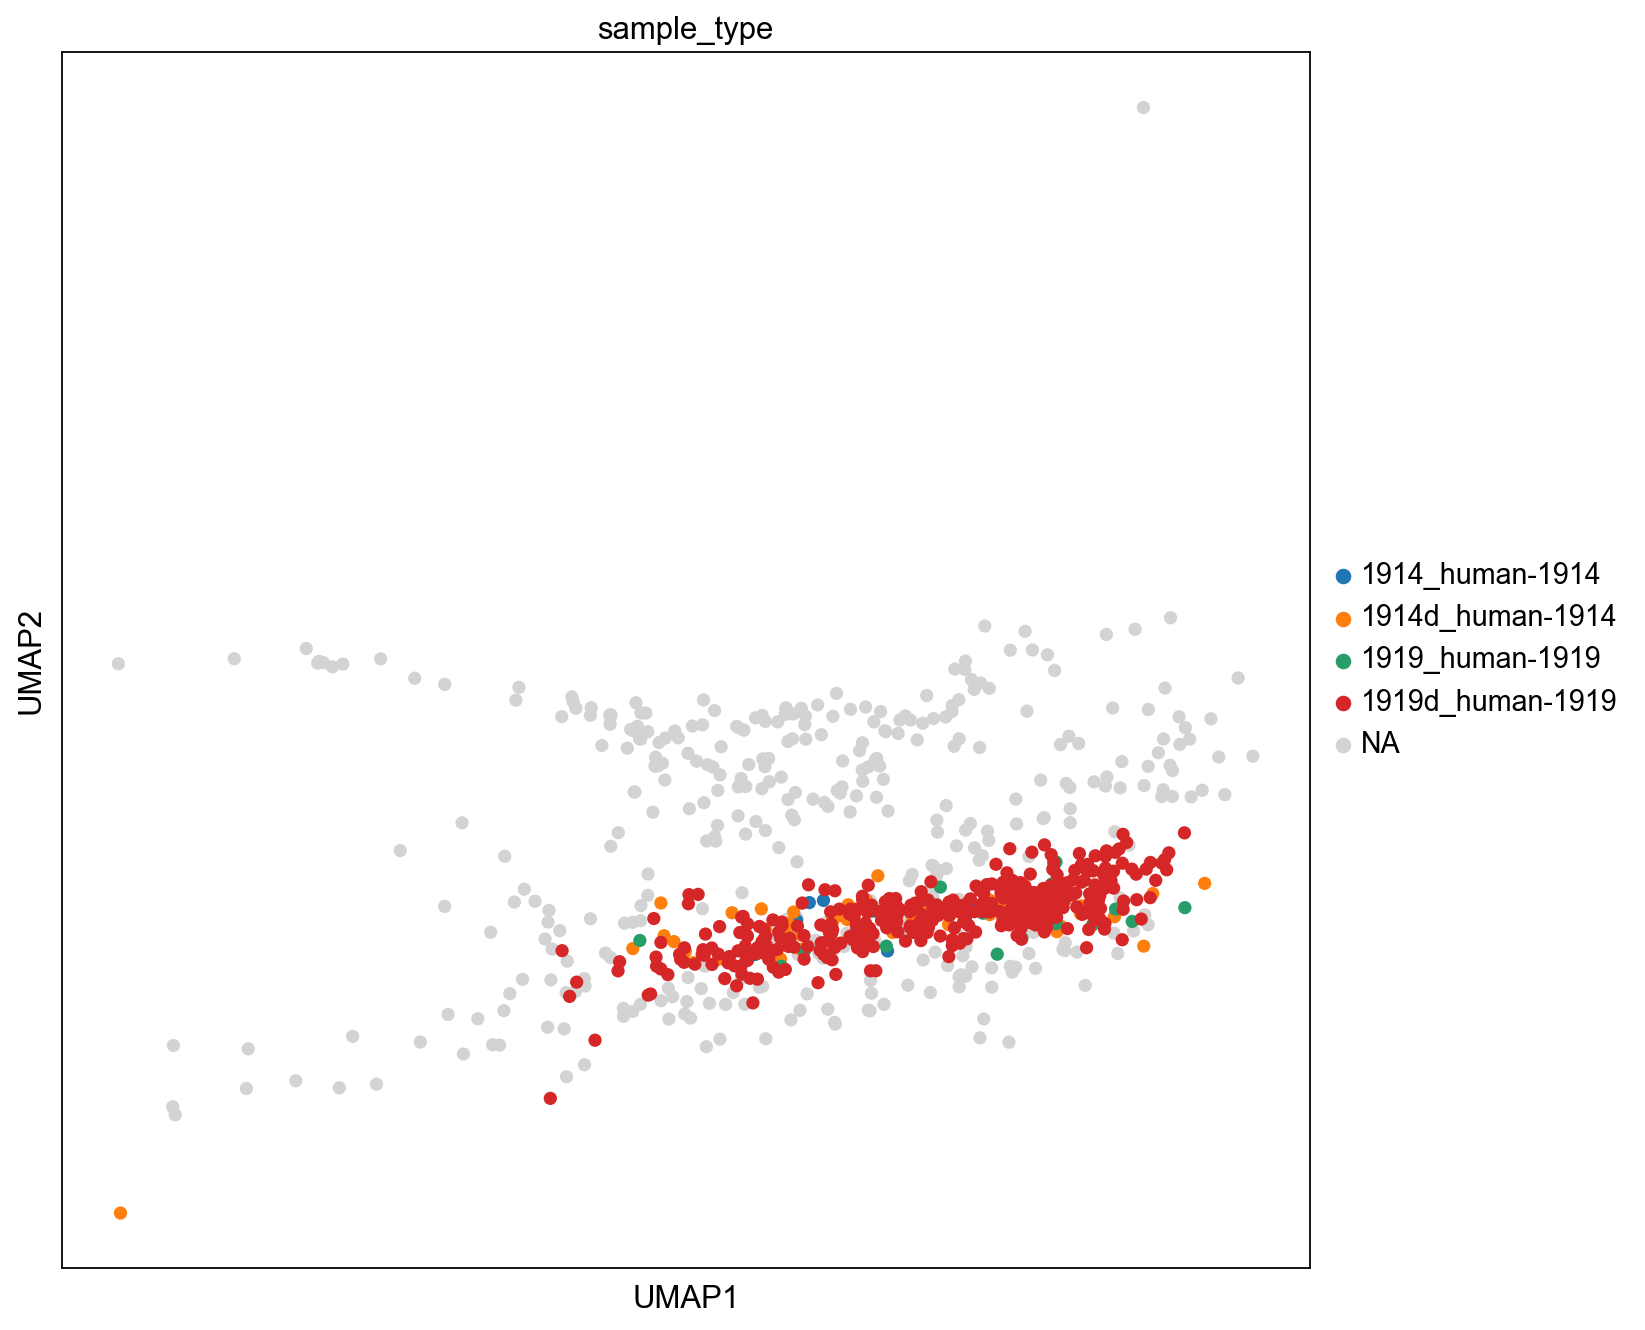

15


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


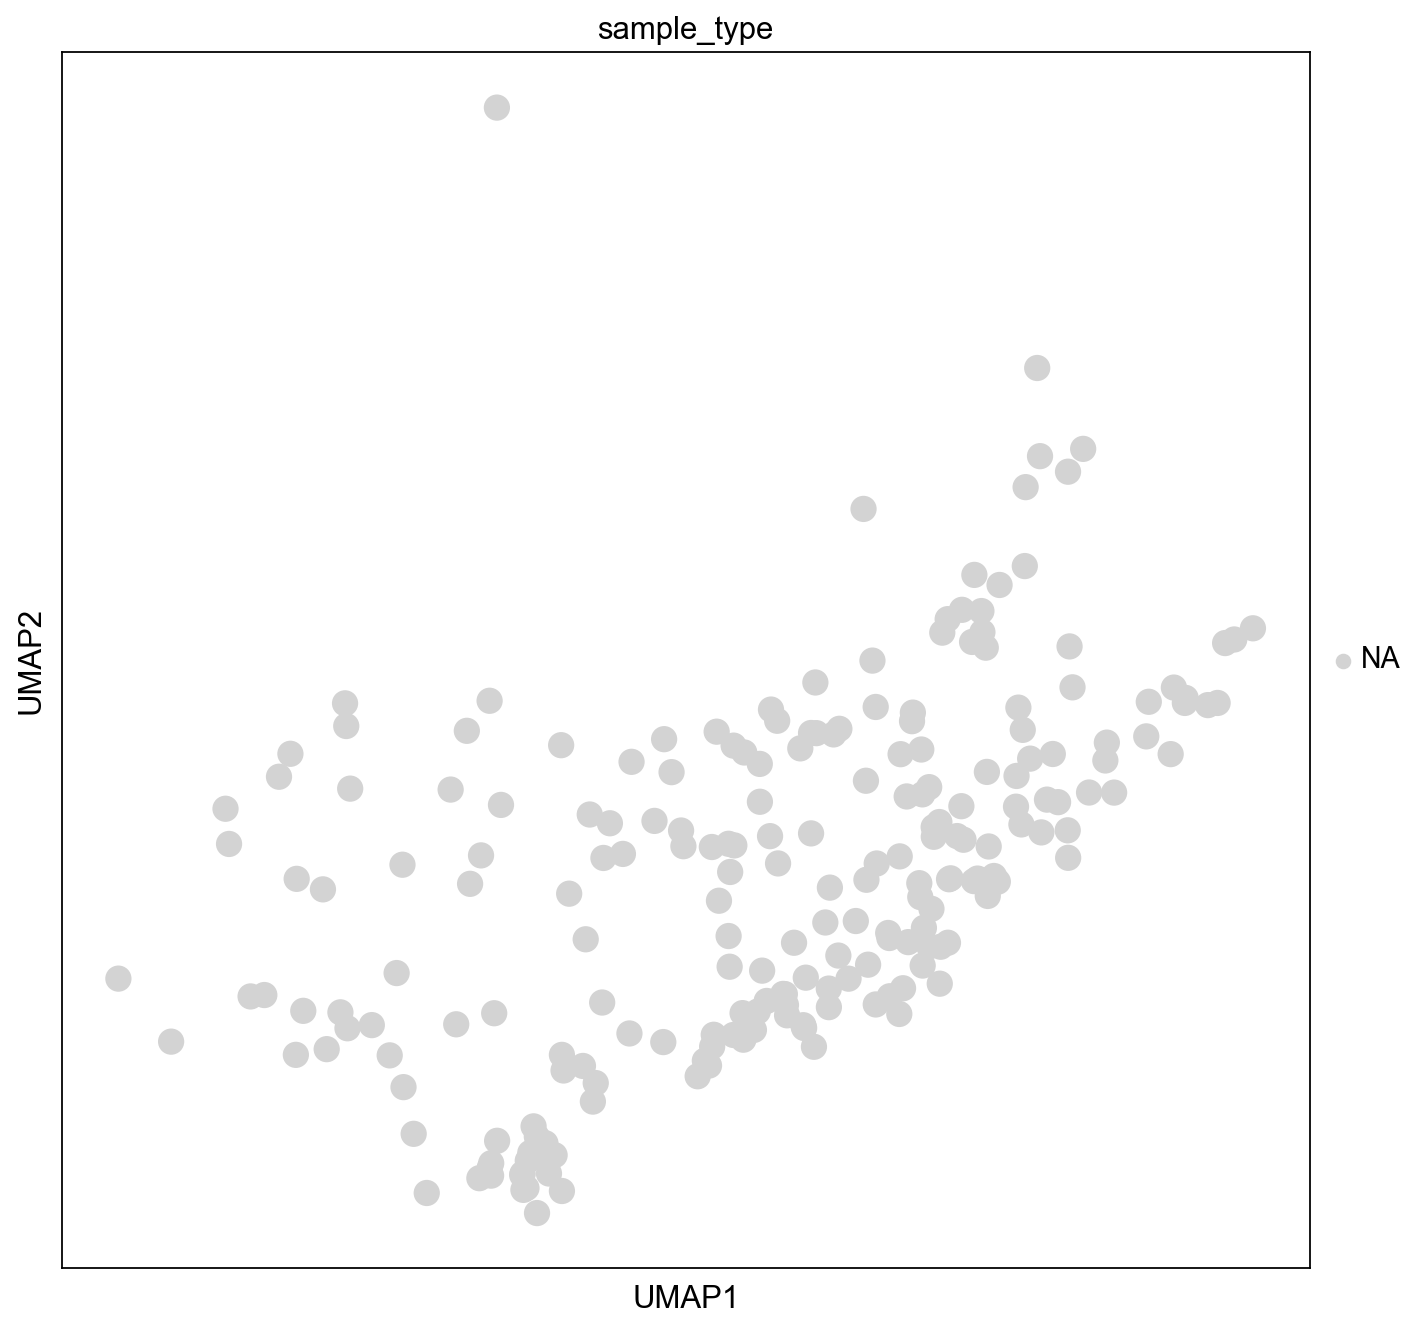

In [57]:
# for each louvain cluster, plot the cell type distribution
for i in adata_concat.obs.leiden.cat.categories:
    print(i)
    try:
        sc.pl.umap(adata_concat[adata_concat.obs.leiden == i], color=['sample_type'])
    except:
        pass
    


In [20]:
# cell_type_2 is based on louvain: cluster 0 = endothelial, cluster 1 = Stem Cells (Mesenchymal), Cluster 2 = Oligodendyrocye-like, Cluster 6 = Astrocyte-like, Cluster 7 = Stem Cells (Mesenchymal, Proneural Mix), Cluster 8 = Stem Cells (Mesenchymal, Proneural Mix)
# for all louvain cluster 0, set cell_type_2 to be Endothelial
adata_concat.obs.loc[adata_concat.obs.louvain == '0', 'cell_type_2'] = 'Endothelial'

# for all louvain cluster 1, set cell_type_2 to be Stem Cells (Mesenchymal)
adata_concat.obs.loc[adata_concat.obs.louvain == '1', 'cell_type_2'] = 'Stem Cells (Mesenchymal)'

# for all louvain cluster 2, set cell_type_2 to be Oligodendyrocye-like
adata_concat.obs.loc[adata_concat.obs.louvain == '2', 'cell_type_2'] = 'Oligodendyrocye-like'

# for all louvain cluster 6, set cell_type_2 to be Astrocyte-like
adata_concat.obs.loc[adata_concat.obs.louvain == '6', 'cell_type_2'] = 'Astrocyte-like'

# for all louvain cluster 7, set cell_type_2 to be Stem Cells (Mesenchymal, Proneural Mix)
adata_concat.obs.loc[adata_concat.obs.louvain == '7', 'cell_type_2'] = 'Stem Cells (Mesenchymal, Proneural Mix)'

# for all louvain cluster 8, set cell_type_2 to be Stem Cells (Mesenchymal, Proneural Mix)
adata_concat.obs.loc[adata_concat.obs.louvain == '8', 'cell_type_2'] = 'Stem Cells (Mesenchymal, Proneural Mix)'


In [108]:
adata_concat.obs

cell_type batch  \
AAACCCAAGAAGGTAG-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCAAGACCTCCG-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCACAACTTGGT-1-SF10022-ref           Neoplastic_cell/proneural   ref   
AAACCCAGTCTACGAT-1-SF10022-ref                     Oligodendrocyte   ref   
AAACCCAGTTATCTTC-1-SF10022-ref         Neoplastic_cell/mesenchymal   ref   
...                                                            ...   ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new                          NaN   new   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new                          NaN   new   

                                      louvain     sample_type  \
AAACCCAAGAAGGTAG-1-SF10022-ref              1             NaN   
AAACCCAAGACCTCCG-1-SF10022-ref              1             NaN   
AAACCCACAACTTGGT-1-SF10022-ref              1             NaN   
AAACCCAGTCTACGAT-1-SF10022-ref              2             NaN   
AAACCCAGTTATCTTC-1-SF10022-ref              1             NaN   
...                                       ...             ...   
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new       0  1919d_rat-1919   
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new       0  1919d_rat-1919   
TTTGTTGTCCATACTT-1-1919d_rat-1919-new       0  1919d_rat-1919   
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new       0  1919d_rat-1919   
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new       0  1919d_rat-1919   

                                                    cell_type_2  
AAACCCAAGAAGGTAG-1-SF10022-ref         Stem Cells (Mesenchymal)  
AAACCCAAGACCTCCG-1-SF10022-ref         Stem Cells (Mesenchymal)  
AAACCCACAACTTGGT-1-SF10022-ref         Stem Cells (Mesenchymal)  
AAACCCAGTCTACGAT-1-SF10022-ref             Oligodendyrocye-like  
AAACCCAGTTATCTTC-1-SF10022-ref         Stem Cells (Mesenchymal)  
...                                                         ...  
TTTGTTGCATCCTTGC-1-1919d_rat-1919-new               Endothelial  
TTTGTTGGTGTAGTGG-1-1919d_rat-1919-new               Endothelial  
TTTGTTGTCCATACTT-1-1919d_rat-1919-new               Endothelial  
TTTGTTGTCCCAAGCG-1-1919d_rat-1919-new               Endothelial  
TTTGTTGTCGCCATAA-1-1919d_rat-1919-new               Endothelial  

[82276 rows x 5 columns]

In [4]:
!pip3 install celltypist | grep -v 'Requirement already satisfied'


In [42]:
import celltypist


In [58]:

# normalize data
sc.pp.normalize_total(adata_ref_combined, target_sum=1e4)
sc.pp.log1p(adata_ref_combined)

normalizing counts per cell
    finished (0:00:00)


In [59]:
import time
t_start = time.time()
model_fs = celltypist.train(adata_ref_combined, 'cell_type', n_jobs = 10, max_iter = 5, use_SGD = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")


🍳 Preparing data before training
✂️ 4636 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
✅ Model training done!


Time elapsed: 22.58592200279236 seconds


In [115]:
model_fs.write('write/model_fs.pkl')

In [60]:
gene_index = np.argpartition(np.abs(model_fs.classifier.coef_), -1000, axis = 1)[:, -1000:]
gene_index = np.unique(gene_index)
print(f"Number of genes selected: {len(gene_index)}")

Number of genes selected: 5778


In [129]:
t_start = time.time()
model = celltypist.train(adata_ref_combined[:,gene_index], 'cell_type', check_expression = False, n_jobs = 10, max_iter = 100, balance_cell_type=True, use_SGD = True)
t_end = time.time()
print(f"Time elapsed: {t_end - t_start} seconds")

🍳 Preparing data before training
✂️ 758 non-expressed genes are filtered out
⚖️ Scaling input data
🏋️ Training data using SGD logistic regression
✅ Model training done!


Time elapsed: 14.537906885147095 seconds


In [137]:
model.write('models/snseq_glio.pkl')
adata_total =sc.read_h5ad('write/total_combined.h5ad')

In [46]:
sc.pp.normalize_per_cell(adata_total)
sc.pp.log1p(adata_total)
model = 'models/snseq_glio.pkl'

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [61]:
predictions = celltypist.annotate(adata_total[:,gene_index], model, majority_voting=True)

IndexError: positional indexers are out-of-bounds

In [53]:
predictions.predicted_labels
adata_predict = predictions.to_adata()  

In [54]:
sc.pp.neighbors(adata_predict)
sc.tl.umap(adata_predict)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


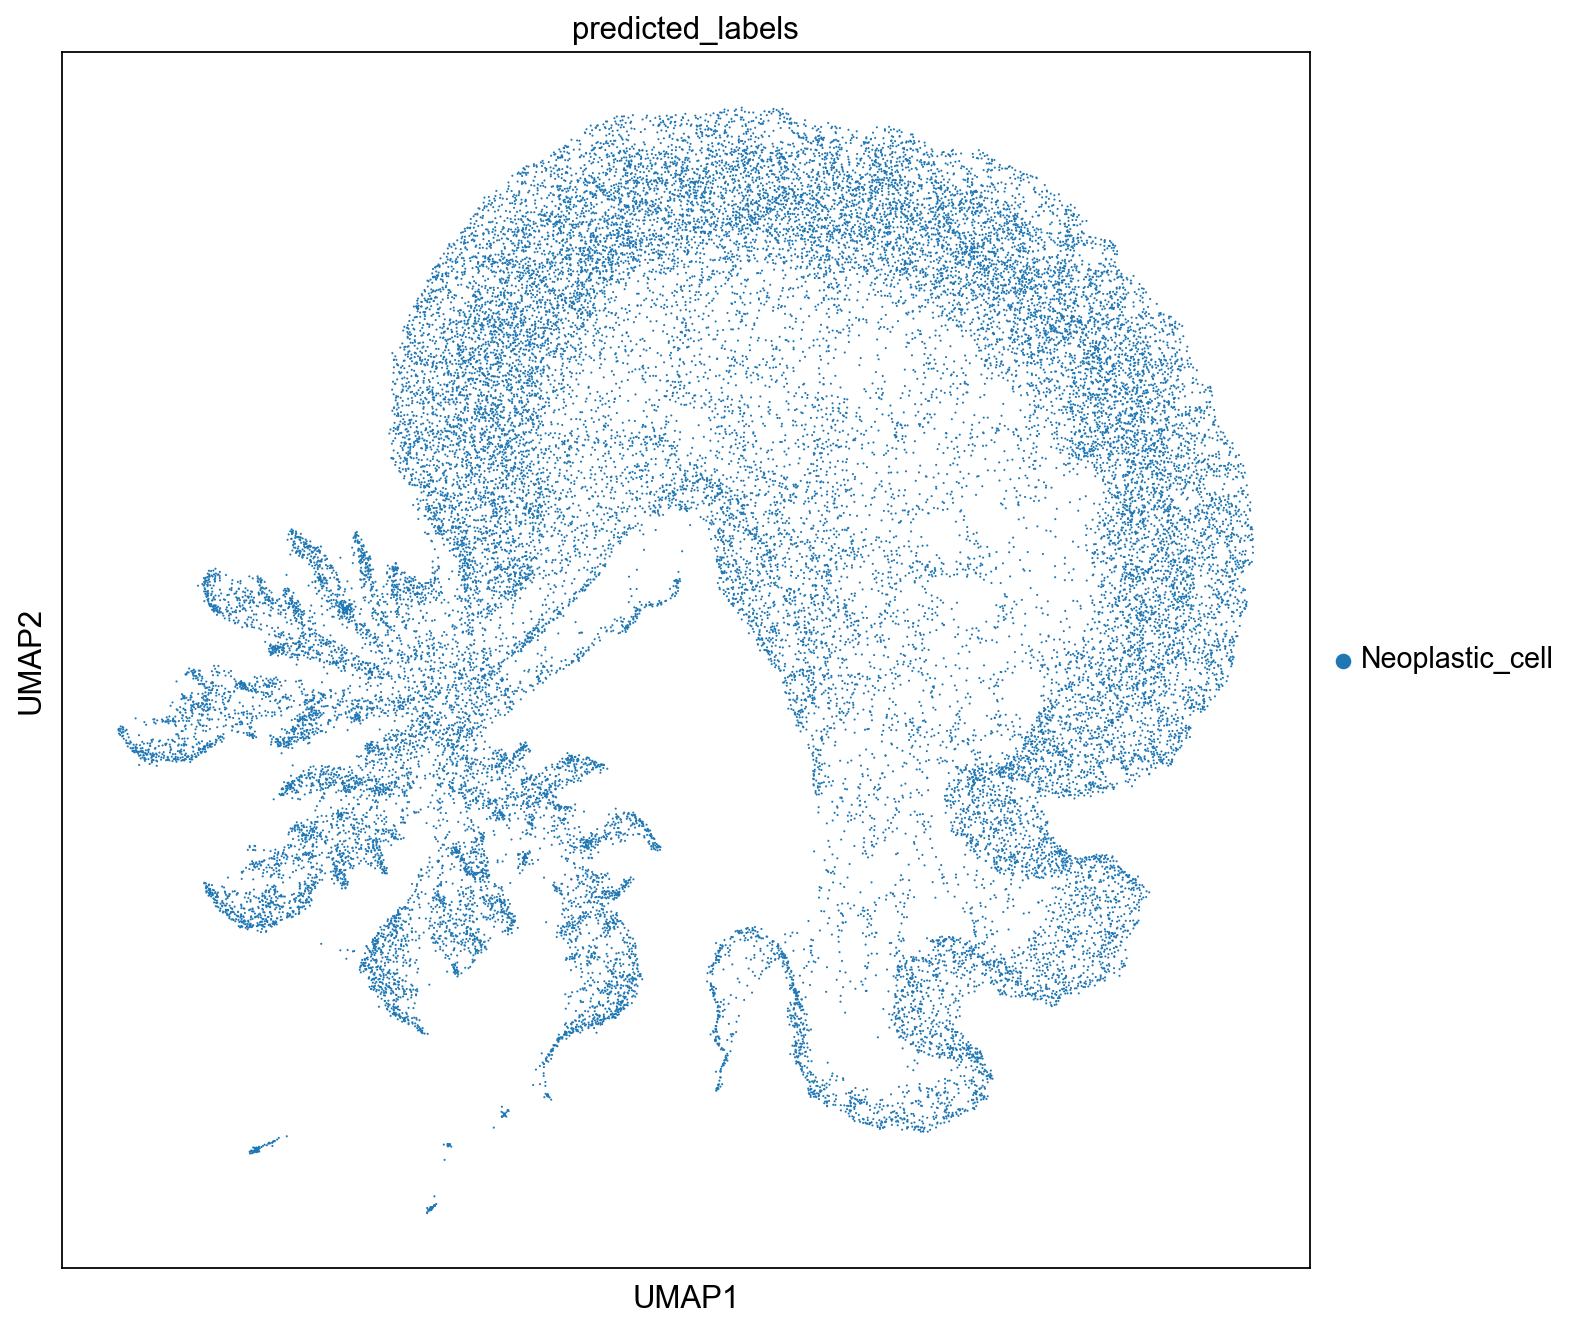

In [55]:
sc.pl.umap(adata_predict, color=['predicted_labels'], wspace = 0.5)

In [200]:
# Group the files in the directory /Volumes/Extreme_SSD/snRNA  that contain the same prefix, before matrix/features/barcodes into folders using the array below:

import os 
import shutil

# create a list of all the files in the directory
files = os.listdir('/Volumes/Extreme_SSD/snRNA/')

# create a list of all the prefixes, which end after the third underscore
prefixes = [file.split('_')[0:3] for file in files]

# group the files by prefix
prefixes = [prefix[0] + '_' + prefix[1] + '_' + prefix[2] for prefix in prefixes]

# remove everything without a . in front of it
prefixes = [prefix for prefix in prefixes if prefix[0] == '.']

# // remove first two characters
prefixes = [prefix[2:] for prefix in prefixes]

prefixes

# remove all files that have ._ in front of them in files array
files = [file for file in files if file[0:2] != '._']

# deduplicate files array
files = list(set(files))

for prefix in prefixes:
    try:
        os.makedirs('/Volumes/Extreme_SSD/snRNA/' + prefix)
    except:
        print('folder already exists')
    for file in files:
        if prefix in file:
            try:
                shutil.move('/Volumes/Extreme_SSD/snRNA/' + file, '/Volumes/Extreme_SSD/snRNA/' + prefix + '/' + file)
            except:
                print('file already moved')


